In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
claim_dataset=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
claim_dataset

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
claim_dataset.shape

(1000, 40)

In [4]:
claim_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
claim_dataset.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
claim_dataset.duplicated('policy_number').sum()

0

In [10]:
#Check missing value
missing_values = claim_dataset.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(claim_dataset))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
age                                       0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
property_damage                           0             0.0
bodily_injuries                           0             0.0
witnesses                                 0             0.0
police_report_available                   0             0.0
total_claim_amount                        0             0.0
injury_claim                              0             0.0
property_claim                            0             0.0
vehicle_claim                             0             0.0
auto_make                               

In [11]:
claim_dataset.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [12]:
# Converting Date columns from object type into datetime data type
claim_dataset['policy_bind_date']=pd.to_datetime(claim_dataset['policy_bind_date'])
claim_dataset['incident_date']=pd.to_datetime(claim_dataset['incident_date'])

In [13]:
# Extracting Day, Month and Year column from policy_bind_date
claim_dataset['policy_bind_day'] = claim_dataset['policy_bind_date'].dt.day
claim_dataset['policy_bind_month'] = claim_dataset['policy_bind_date'].dt.month
claim_dataset['policy_bind_year'] = claim_dataset['policy_bind_date'].dt.year

In [14]:
# Extracting Day, Month and Year column from incident_date
claim_dataset['incident_day'] = claim_dataset['incident_date'].dt.day
claim_dataset['incident_month'] = claim_dataset['incident_date'].dt.month
claim_dataset['incident_year'] = claim_dataset['incident_date'].dt.year


In [15]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
claim_dataset.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [16]:
# Incident year for all data is 2015 so we gone drop it.
claim_dataset.drop(['incident_year'],axis=1,inplace=True)

In [17]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
claim_dataset['Automobile_Age']=2015 - claim_dataset['auto_year']
claim_dataset.drop("auto_year",axis=1,inplace=True)

In [18]:
#Spliting feature in categorical and numerical variable
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']


In [19]:
claim_dataset.columns.to_series().groupby(claim_dataset.dtypes).groups


{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium', '_c39'], object: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [20]:
claim_dataset.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  injury_claim  \
count    1000.000000               1000.000000  ...   1000.000000   
mean   -26793.700000                 11.644000  ...   7433.420000   
std     28104.096686                  6.951373  ...   4880.951853   
min   -111100.000000                  0.000000  ...      0.000000   
25%    -51500.000000                  6.000000  ...   4295.000000   
50%    -23250.000000                 12.000000  ...   6775.000000   
75%         0.000000                 17.000000  ...  11305.000000   
max         0.000000                 23.000000  ...  21450.000000   

       property_claim  vehicle_claim  _c39  policy_bind_day  \
count     1000.000000    1000.000000   0.0      1000.000000   
mean      7399.570000   37928.950000   NaN        15.448000   
std       4824.726179   18886.252893   NaN         8.850176   
min          0.000000      70.000000   NaN         1.000000   
25%       4445.000000   30292.500000   NaN         8.000000   
50%       6750.000000   42100.000000   NaN        16.000000   
75%      10885.000000   50822.500000   NaN        23.000000   
max      23670.000000   79560.000000   NaN        31.000000   

       policy_bind_month  policy_bind_year  incident_day  incident_month  \
count        1000.000000       1000.000000    1000.00000     1000.000000   
mean            6.559000       2001.604000      13.08400        3.407000   
std             3.391758          7.360391      10.44318        3.276291   
min             1.000000       1990.000000       1.00000        1.000000   
25%             4.000000       1995.000000       2.00000        1.000000   
50%             7.000000       2002.000000      15.00000        2.000000   
75%             9.000000       2008.000000      22.00000        5.000000   
max            12.000000       2015.000000      31.00000       12.000000   

       Automobile_Age  
count     1000.000000  
mean         9.897000  
std          6.015861  
min          0.000000  
25%          5.000000  
50%         10.000000  
75%         15.000000  
max         20.000000  

[8 rows x 24 columns]

In [21]:
claim_dataset[Category].describe().T.style.background_gradient(cmap='summer_r')

In [22]:
#Start with Enlisting Value counts & Sub-categories of different categorial features available

for i in Category:
    print(i)
    print(claim_dataset[i].value_counts())
    print("="*100)


policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

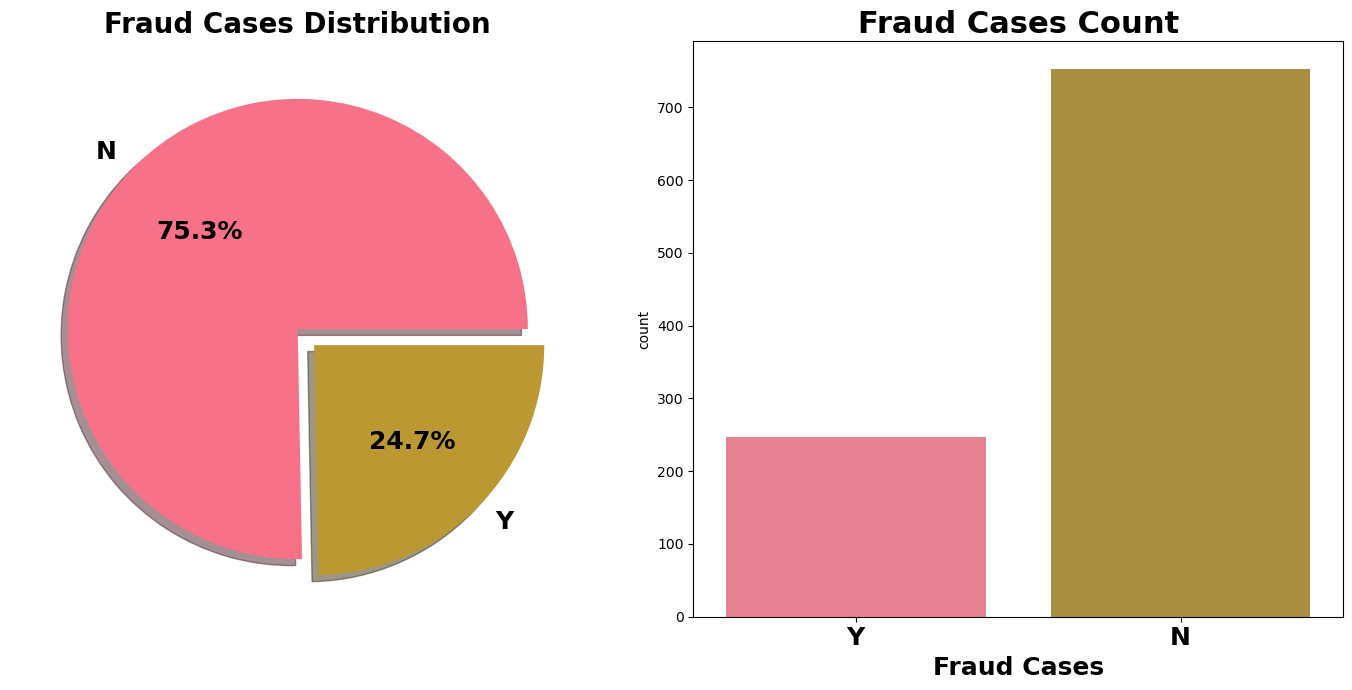

In [24]:
#Start exploring Target variable
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
claim_dataset['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=claim_dataset,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


In [25]:
#Analysing Age vs Fraud
print('Minimum Age :',claim_dataset.age.min(),'Years')
print('Maximum Age :',claim_dataset.age.max(),'Years')
print('Average Age :',claim_dataset.age.mean(),'Years')


Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


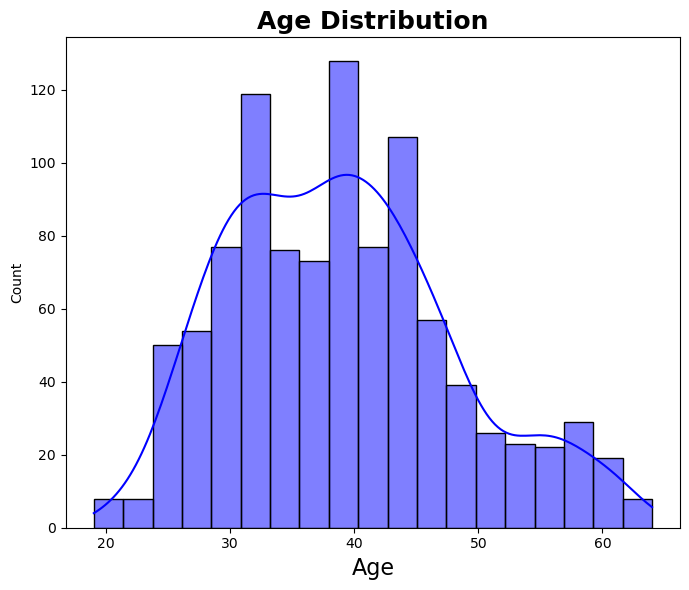

In [26]:
plt.figure(figsize=(7,6))
sns.histplot(claim_dataset.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()


In [28]:
# Spliting age in different age range
claim_dataset['age_bins'] = pd.cut(claim_dataset.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])


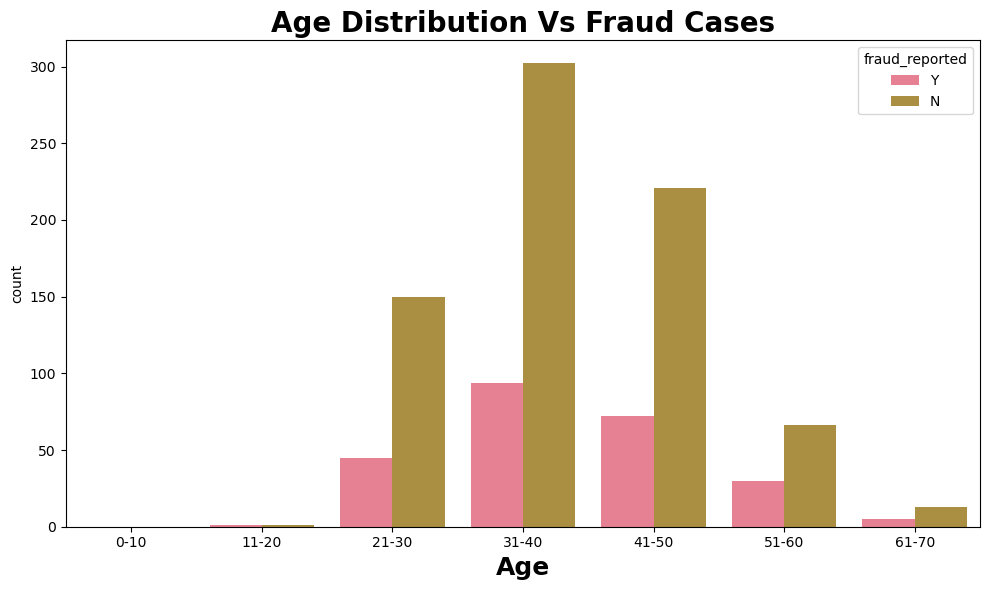

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=claim_dataset.age_bins, hue=claim_dataset.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()


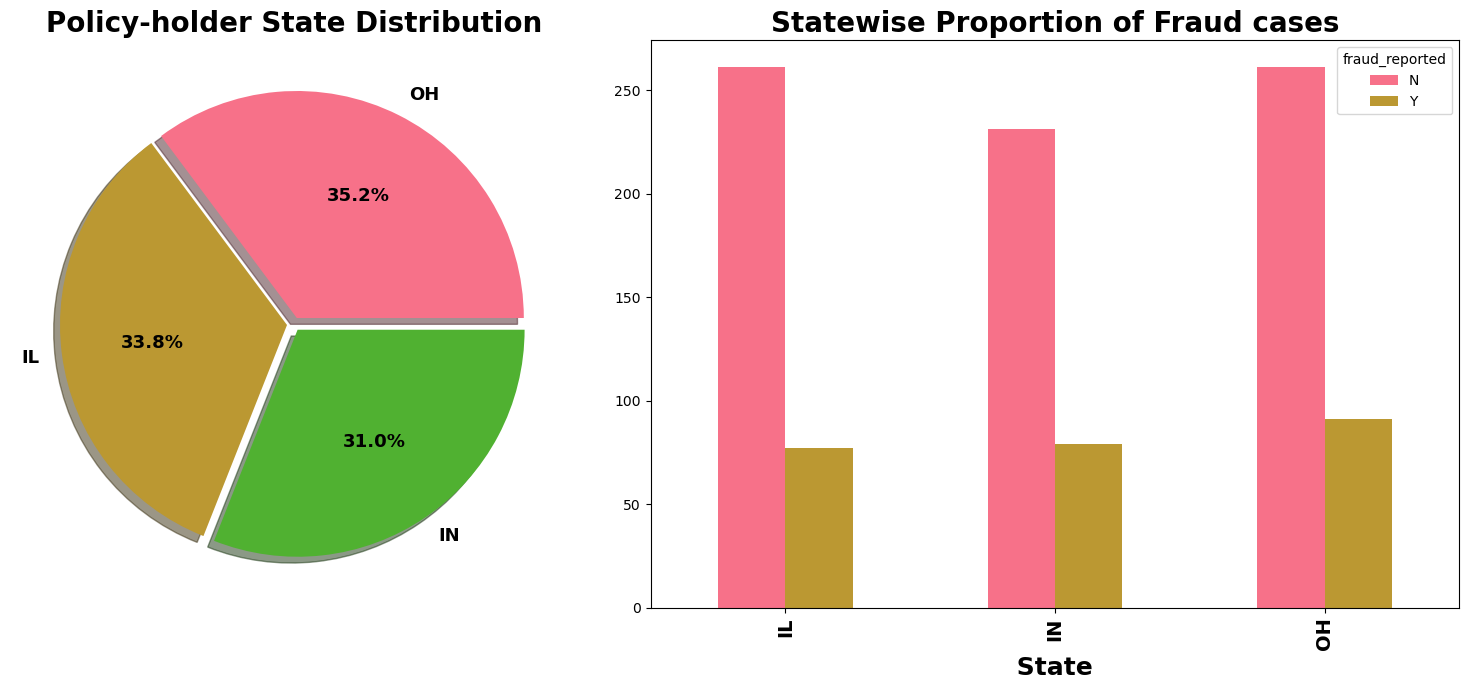

In [30]:
#Policy State Vs Fraud cases
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
claim_dataset['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(claim_dataset['policy_state'], claim_dataset['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


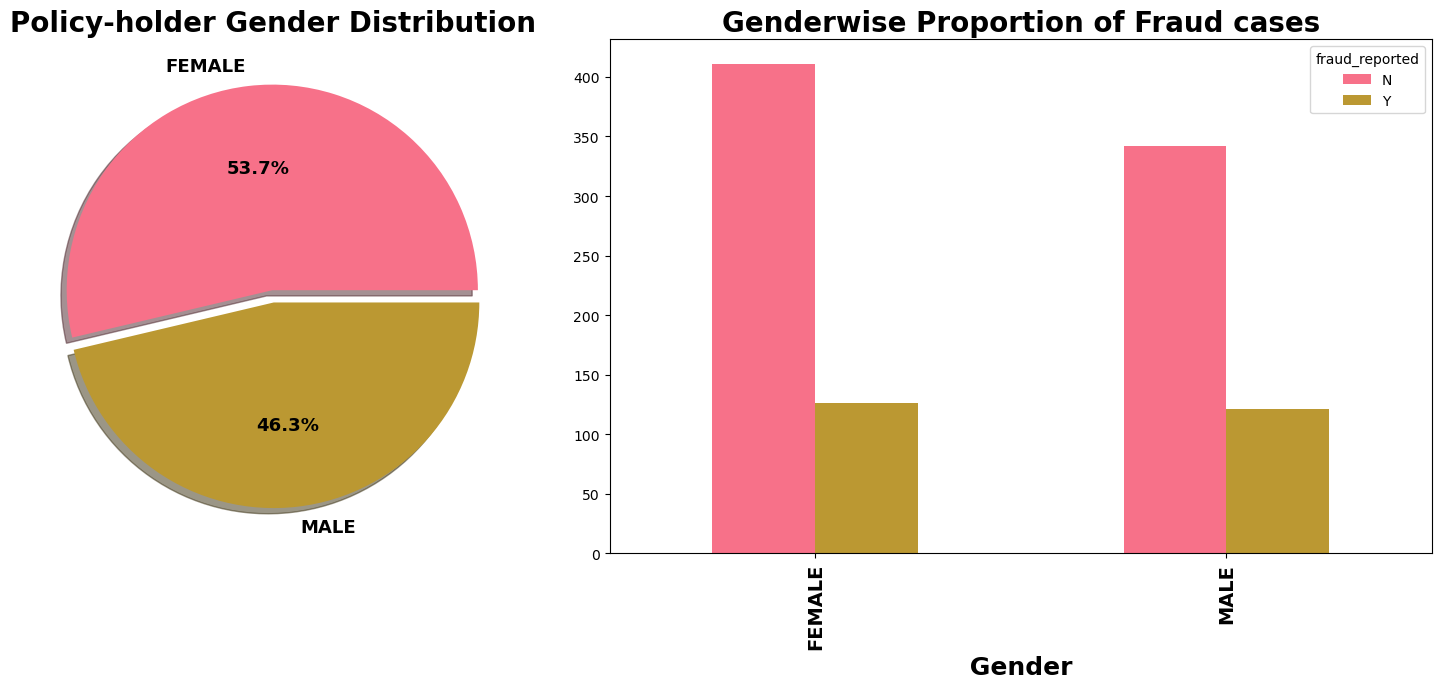

In [31]:
#Insured Gender VS Fraud cases
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
claim_dataset['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(claim_dataset['insured_sex'], claim_dataset['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


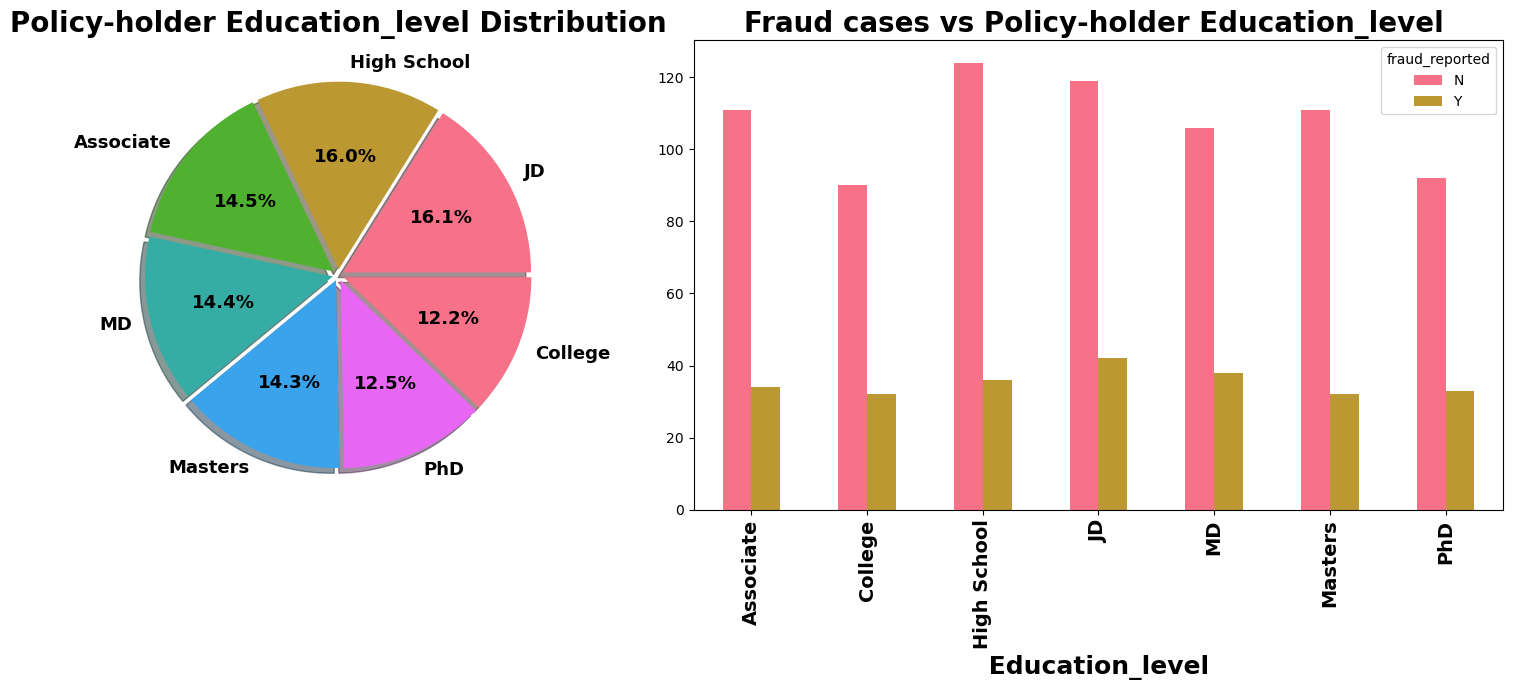

In [32]:
#Education_level vs Fraud cases
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
claim_dataset['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(claim_dataset['insured_education_level'], claim_dataset['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


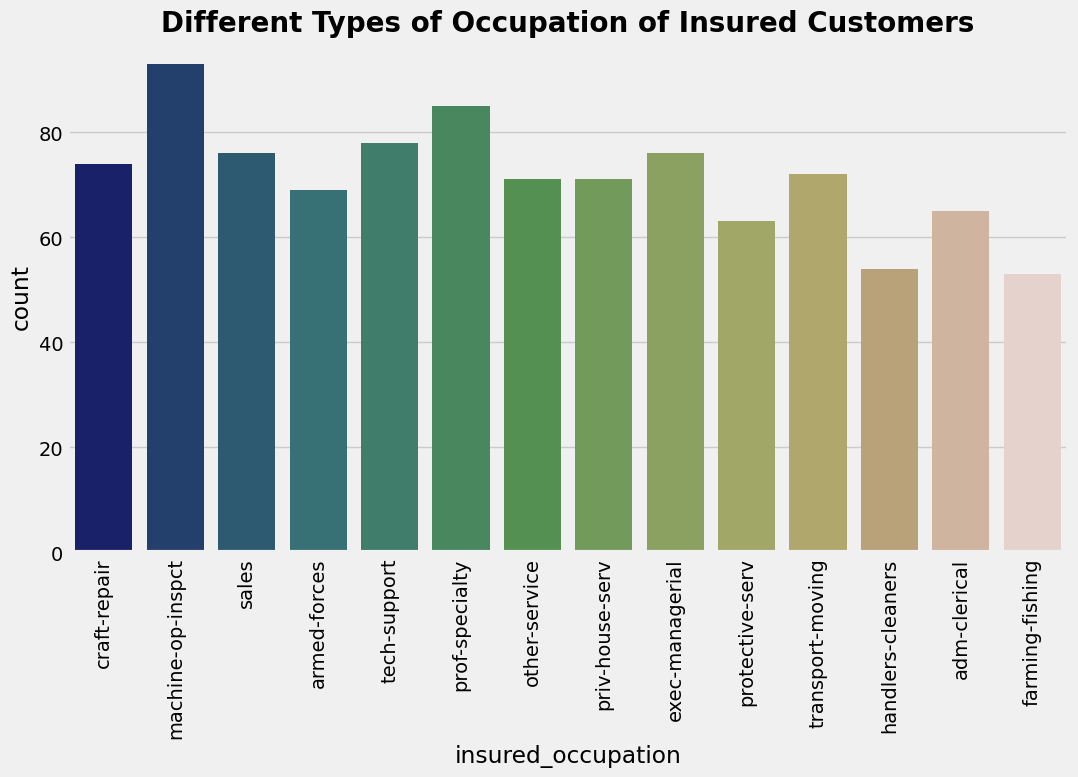

In [33]:
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(claim_dataset['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()


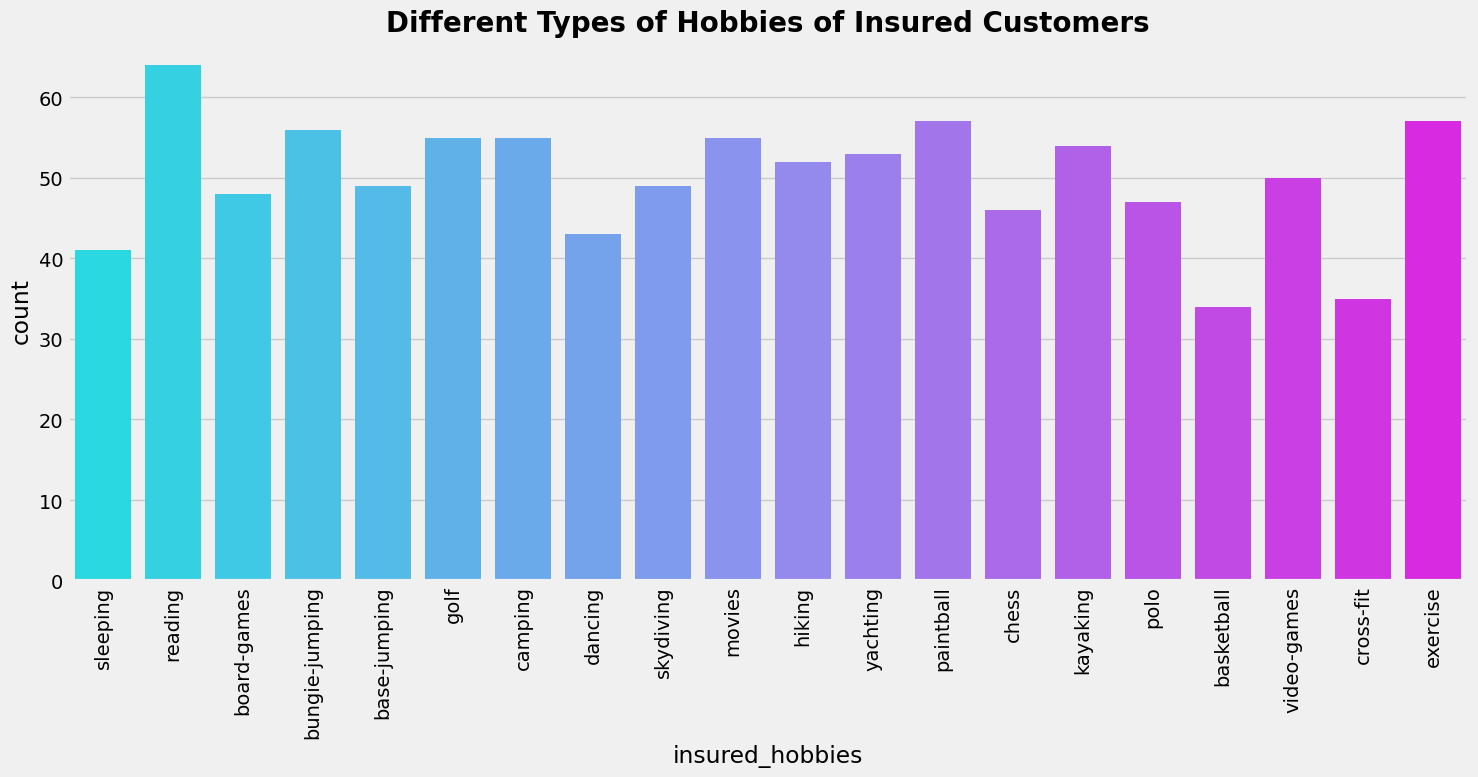

In [34]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(claim_dataset['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 


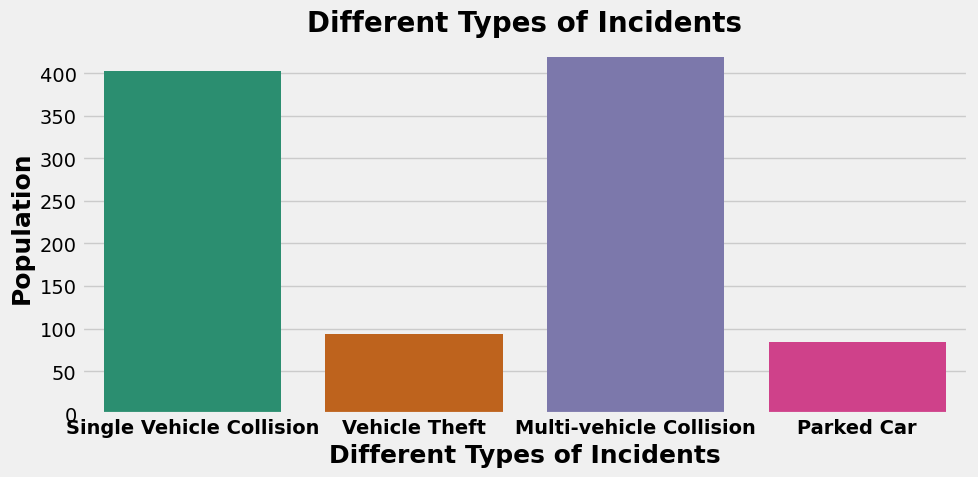

In [35]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(claim_dataset['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()


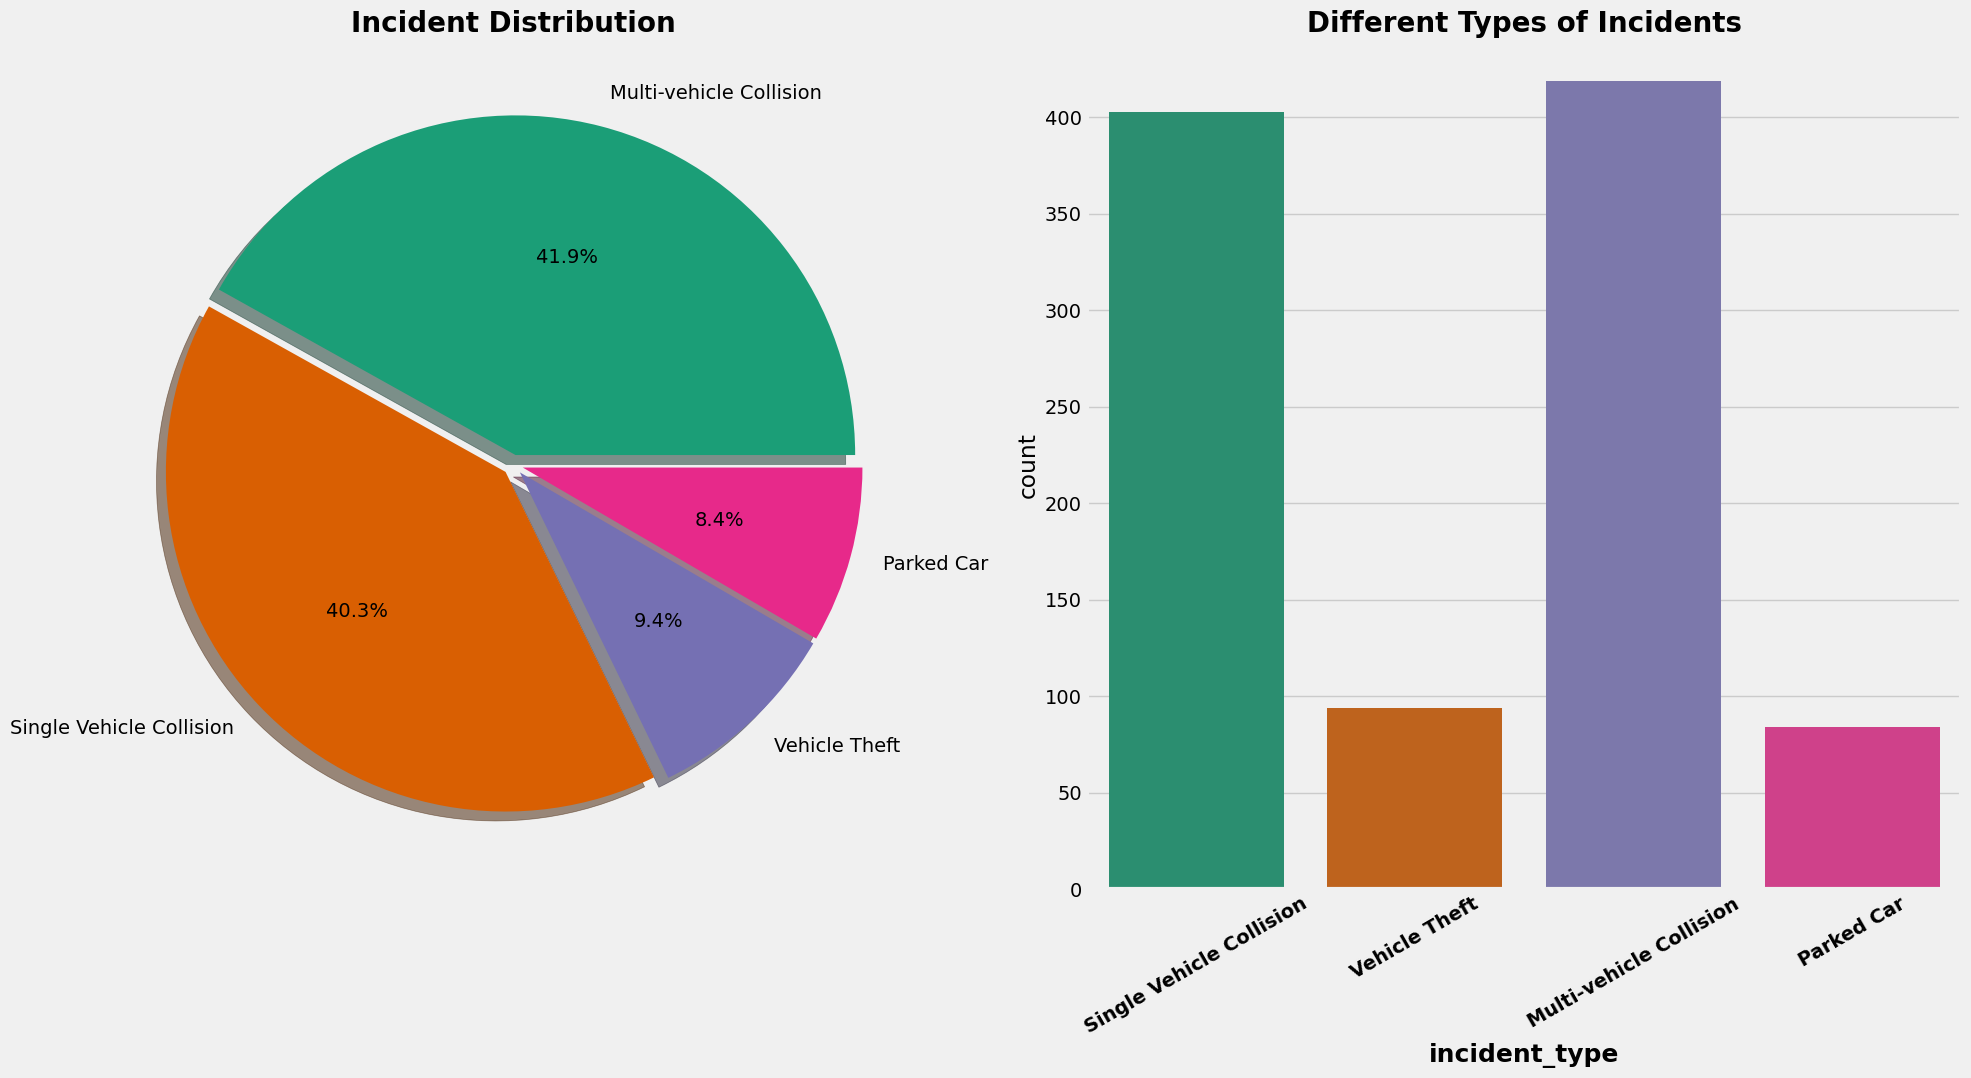

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
claim_dataset['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=claim_dataset,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()


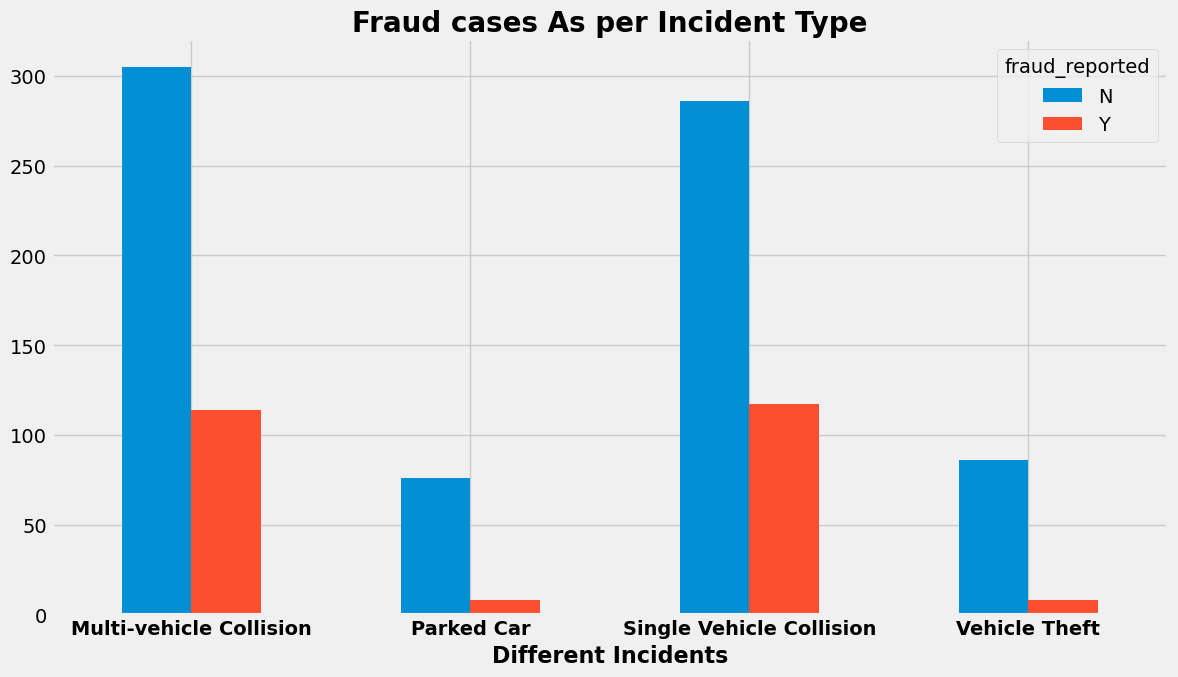

In [37]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(claim_dataset['incident_type'], claim_dataset['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 


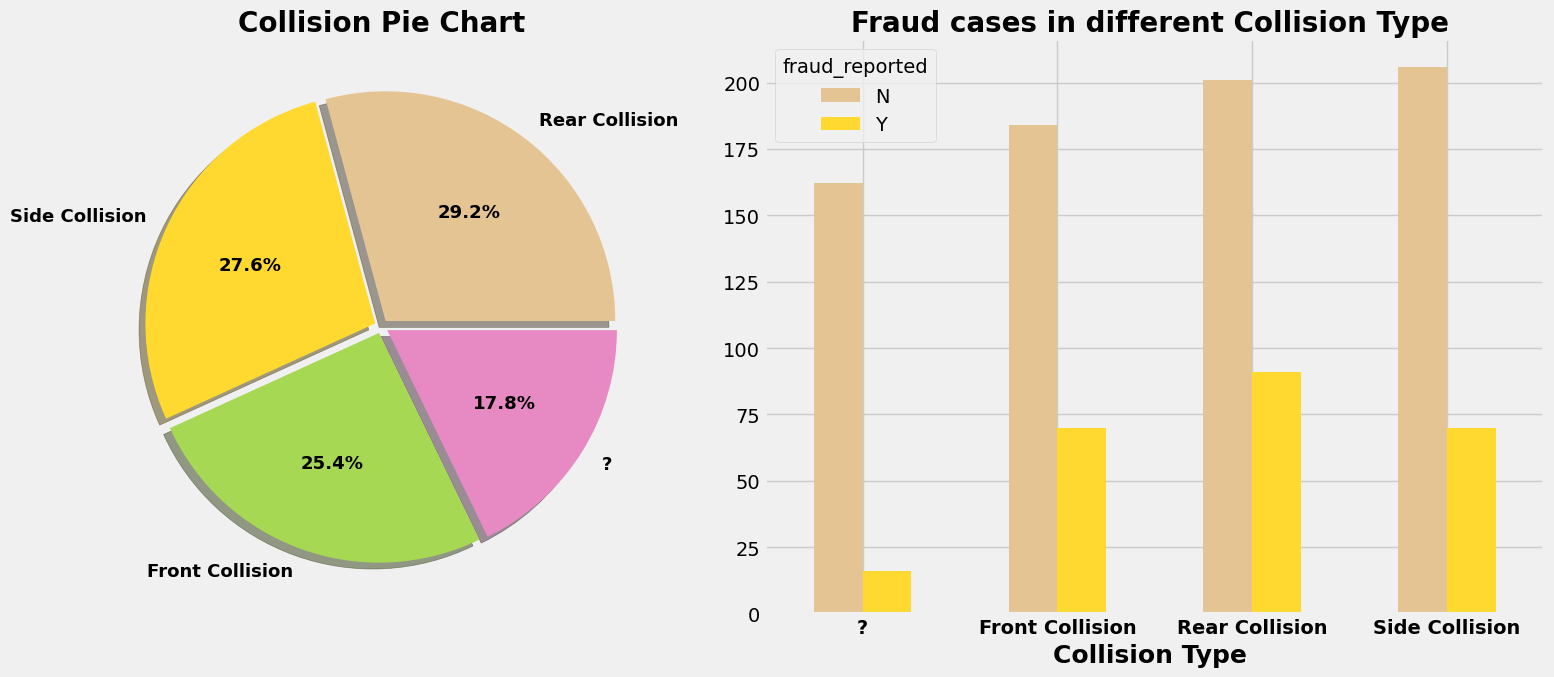

In [42]:
#Exploration of different Collision
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
claim_dataset['collision_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(claim_dataset['collision_type'], claim_dataset['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()


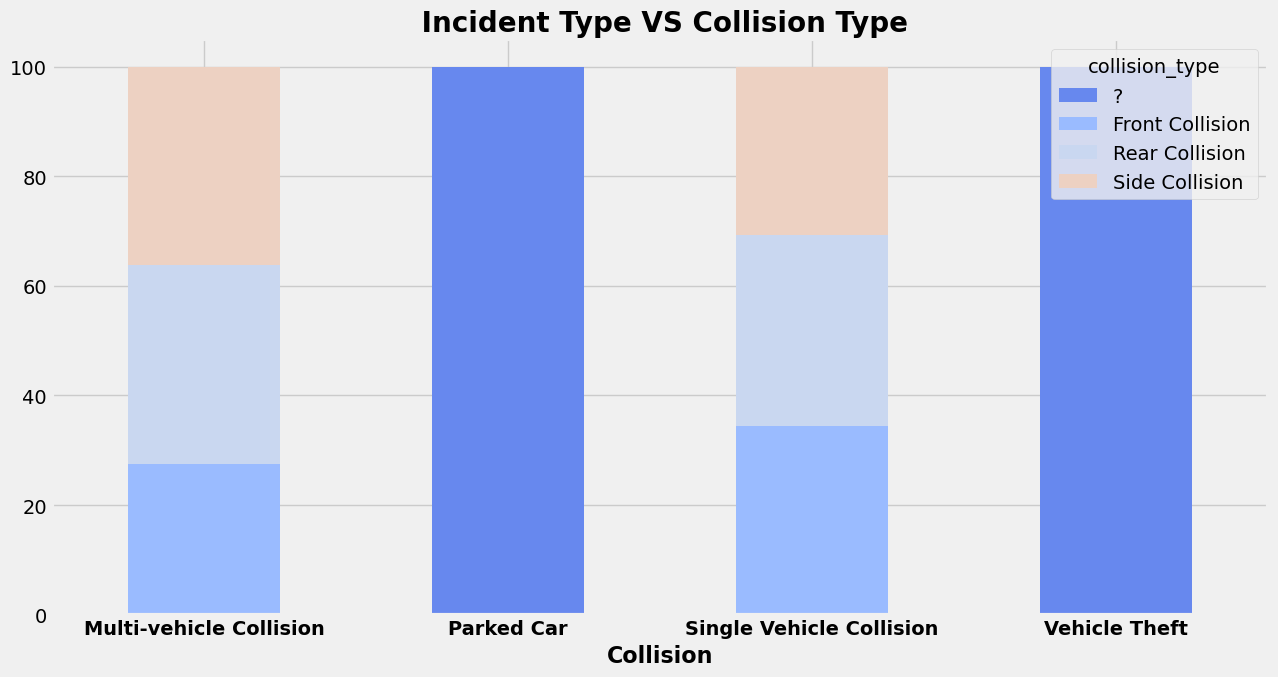

In [43]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(claim_dataset['incident_type'], claim_dataset['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 


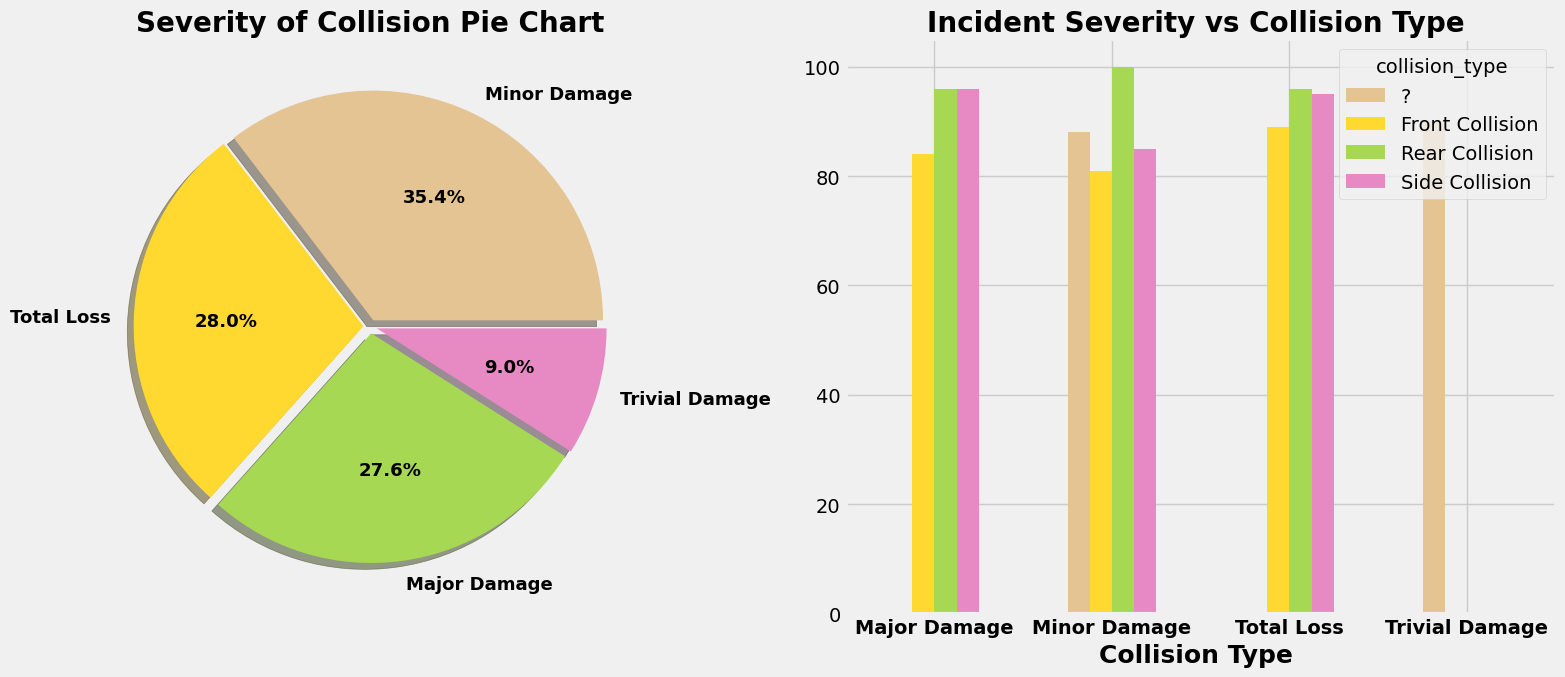

In [44]:
#Collision VS Incident Severity
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
claim_dataset['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(claim_dataset['incident_severity'], claim_dataset['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()


In [45]:
pd.crosstab(claim_dataset['incident_type'], claim_dataset['incident_severity']).style.background_gradient(cmap='summer_r')

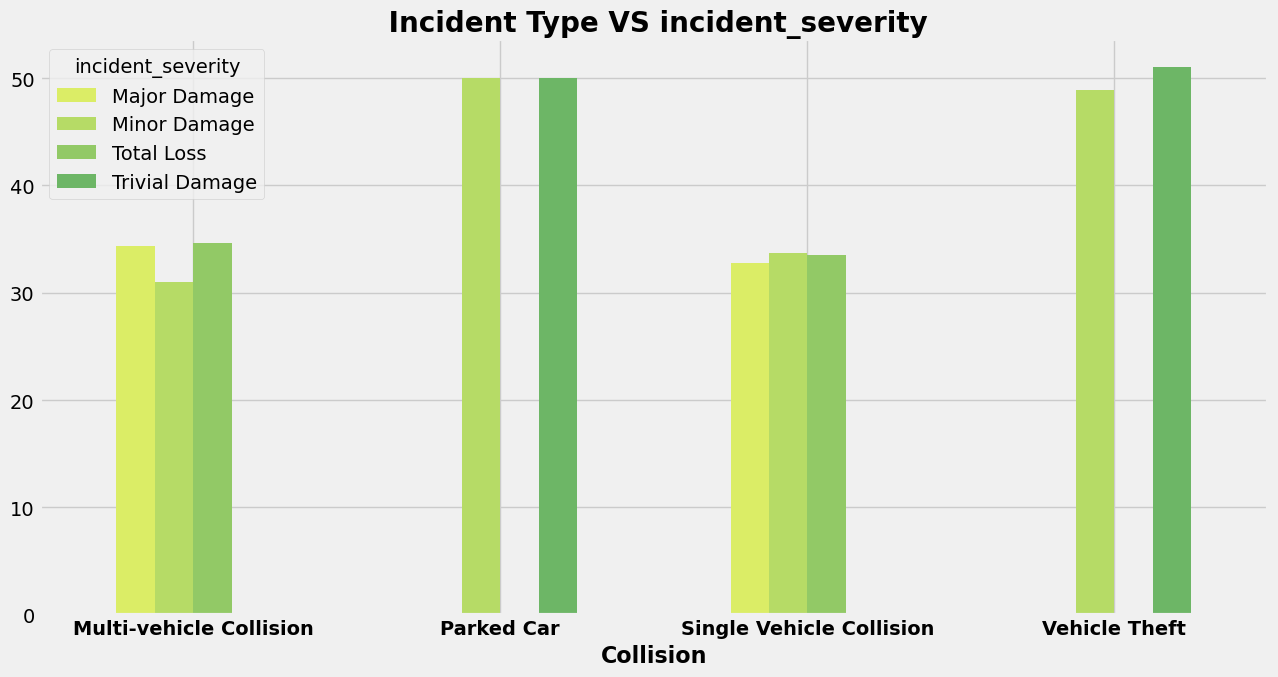

In [46]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(claim_dataset['incident_type'], claim_dataset['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()


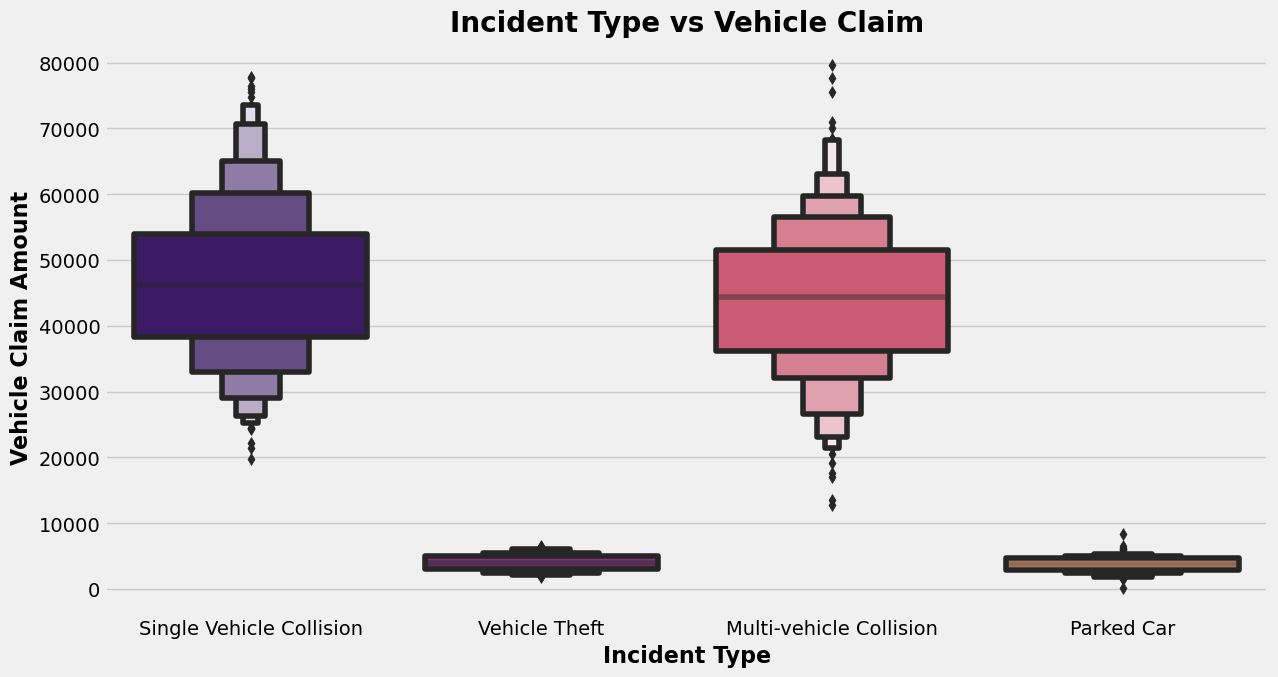

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(claim_dataset['incident_type'], claim_dataset['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()


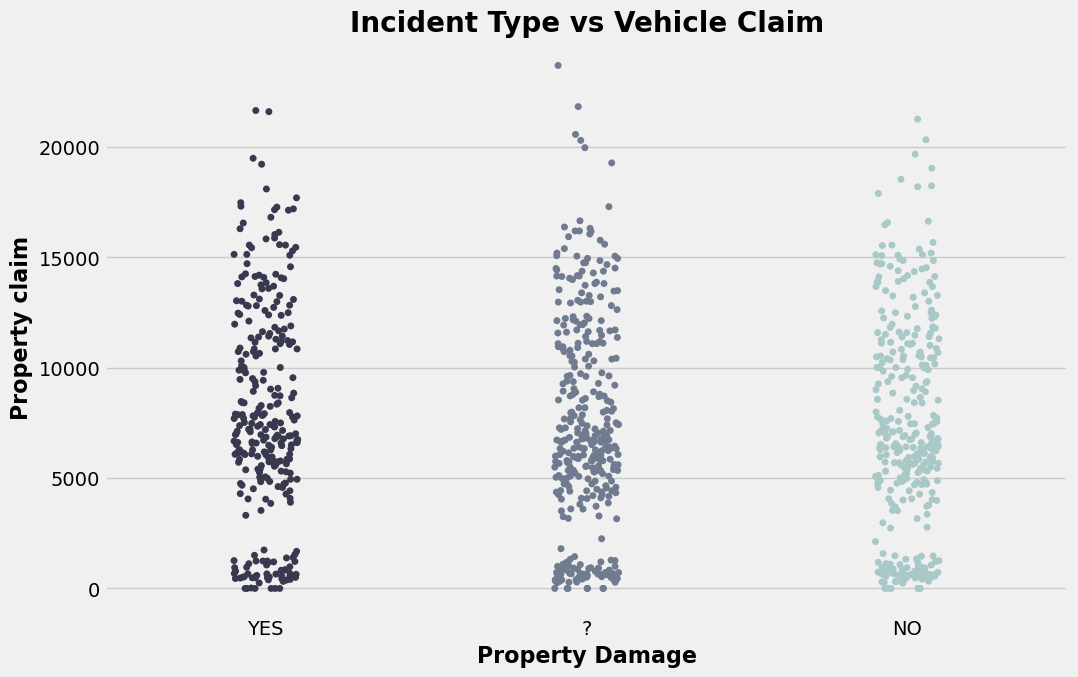

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(claim_dataset['property_damage'], claim_dataset['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()


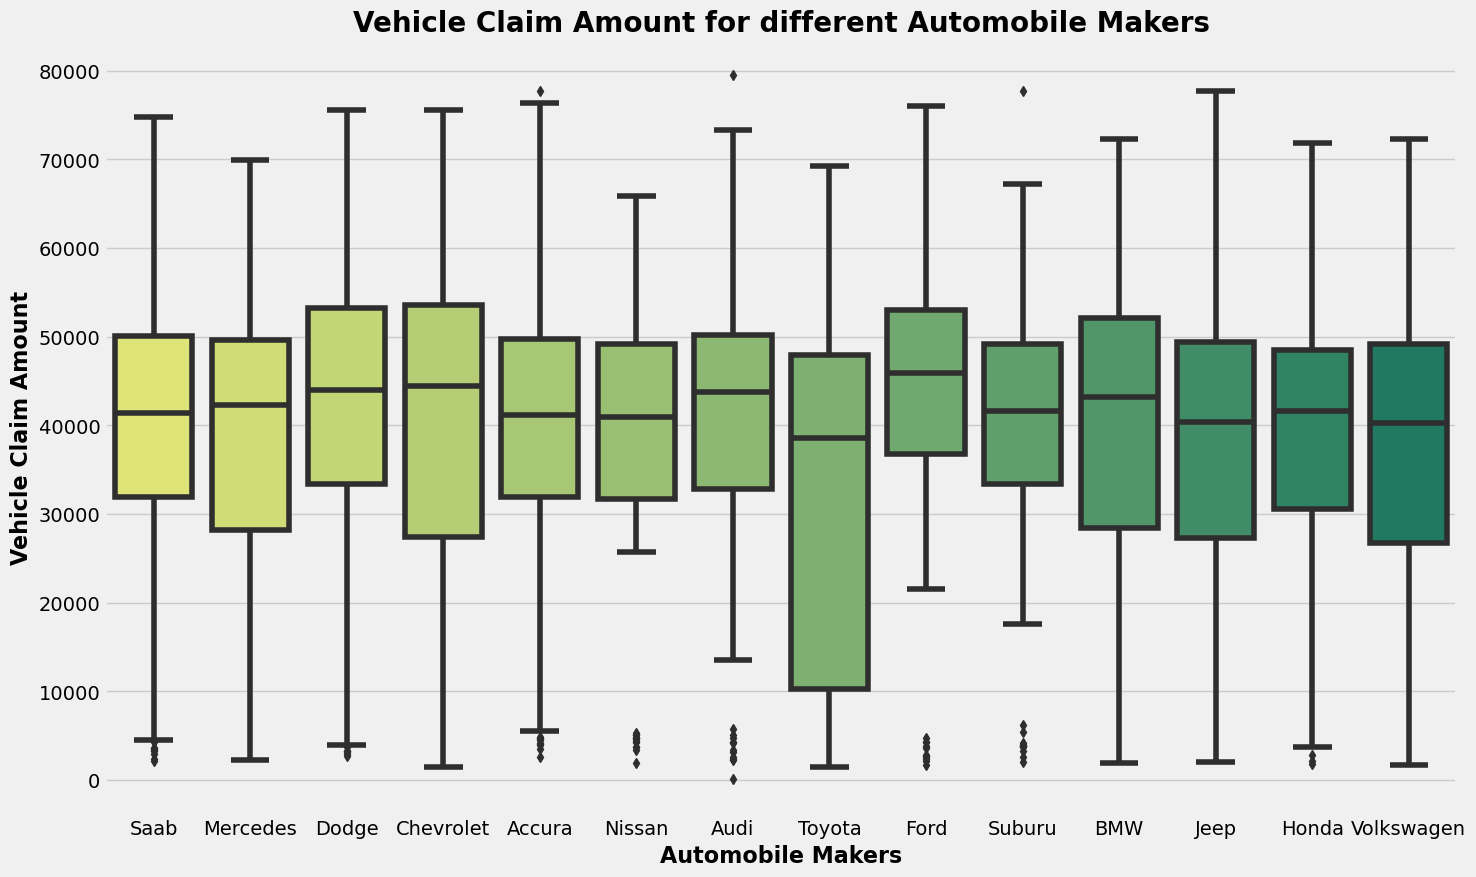

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(claim_dataset['auto_make'], claim_dataset['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()


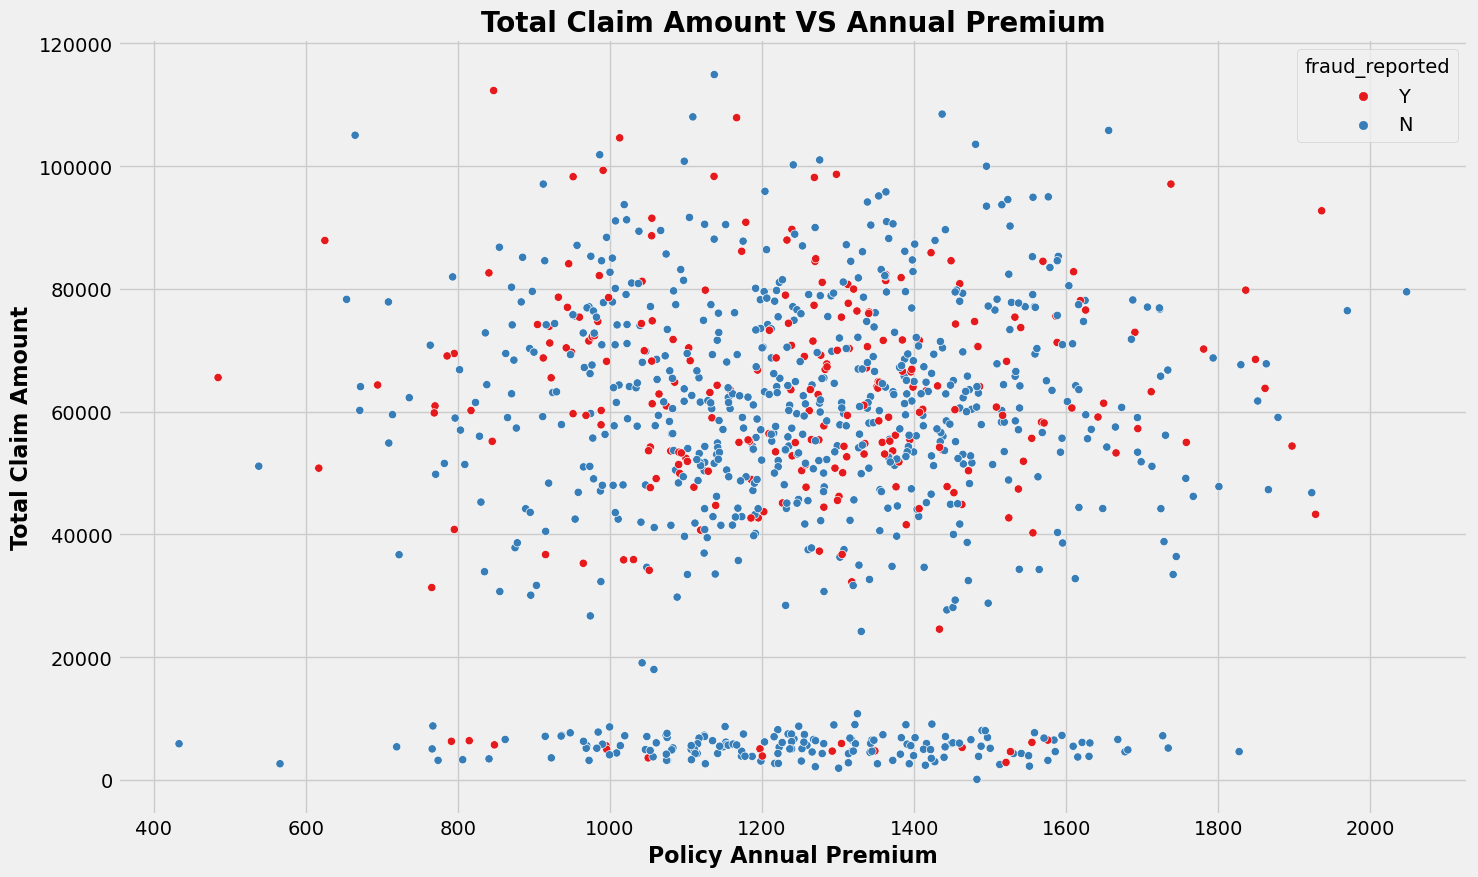

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(claim_dataset['policy_annual_premium'], claim_dataset['total_claim_amount'], hue=claim_dataset.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()


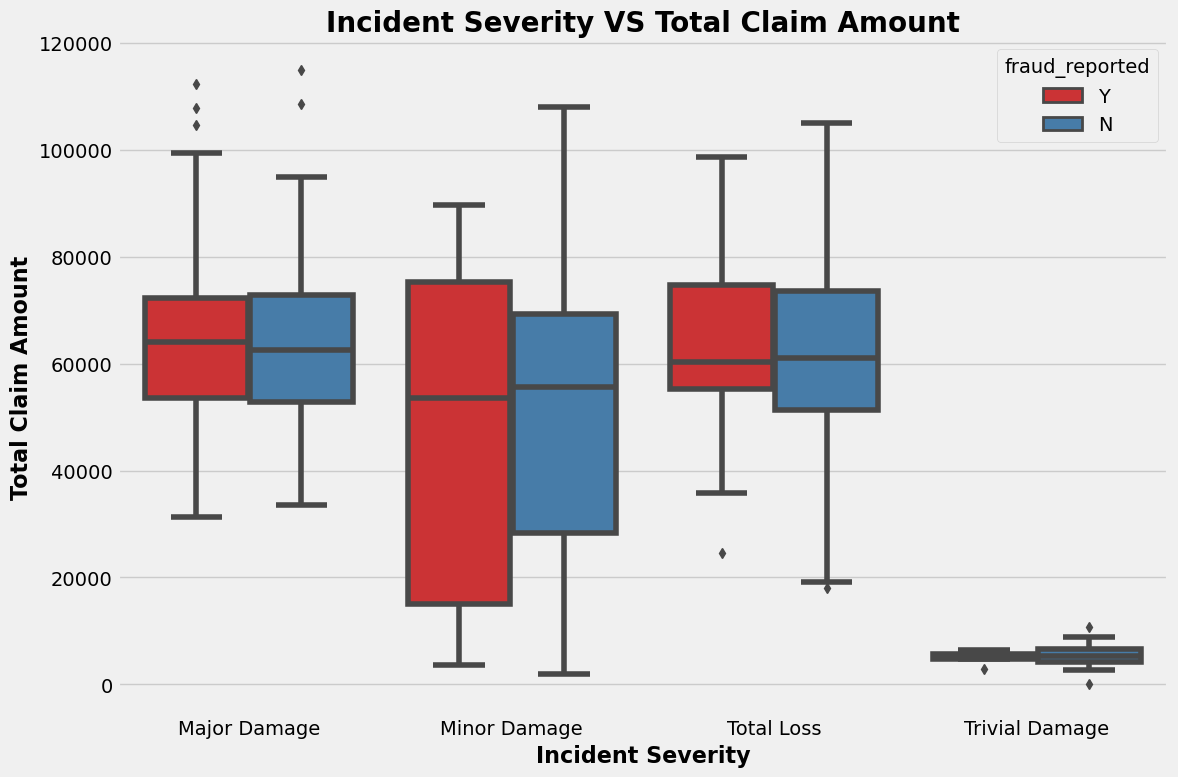

In [51]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.boxplot(claim_dataset['incident_severity'], claim_dataset['total_claim_amount'], hue=claim_dataset.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()


In [52]:
pd.set_option('display.max_columns', None)
claim_dataset.head()


months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1                ?      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4                ?      Minor Damage                  None             NY   

  incident_city  incident_location  incident_hour_of_the_day  \
0      Columbus     9935 4th Drive                         5   
1     Riverwood       6608 MLK Hwy                         8   
2      Columbus  7121 Francis Lane                         7   
3     Arlington   6956 Maple Drive                         5   
4     Arlington       3041 3rd Ave                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1               ?                0          0   
2                            3              NO                2          3   
3                            1               ?                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                       ?                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model fraud_reported  _c39  policy_bind_day  \
0          52080       Saab        92x              Y   NaN               17   
1           3510   Mercedes       E400              Y   NaN               27   
2          23100      Dodge        RAM              N   NaN                9   
3          50720  Chevrolet      Tahoe              Y   NaN               2

In [54]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    claim_dataset[i] = le.fit_transform(claim_dataset[i])
claim_dataset.head()


months_as_customer  age  policy_number  policy_state policy_csl  \
0                 328   48         521585             2    250/500   
1                 228   42         342868             1    250/500   
2                 134   29         687698             2    100/300   
3                 256   41         227811             0    250/500   
4                 228   44         367455             0   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0            1                        4                   2               17   
1            1                        4                   6               15   
2            0                        6                  11                2   
3            0                        6                   1                2   
4            1                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               3                  0                      4               4   
1               0                  1                      4               5   
2               2                  1                      4               1   
3               1                  0                      4               2   
4               0                  1                      2               1   

   incident_city  incident_location  incident_hour_of_the_day  \
0              1     9935 4th Drive                         5   
1              5       6608 MLK Hwy                         8   
2              1  7121 Francis Lane                         7   
3              0   6956 Maple Drive                         5   
4              0       3041 3rd Ave                        20   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                            1                2                1          2   
1                            1                0                0          0   
2                            3                1                2          3   
3                            1                0                1          2   
4                            1                1                0          1   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        2               71610          6510           13020   
1                        0                5070           780             780   
2                        1               34650          7700            3850   
3                        1               63400          6340            6340   
4                        1                6500          1300             650   

   vehicle_claim  auto_make  auto_model  fraud_reported  _c39  \
0          52080         10           1               1   NaN   
1           3510          8          12               1   NaN   
2          23100          4          30               0   NaN   
3          50720          3          34               1   NaN   
4           4550          0          31               0   NaN   

   p

In [58]:
##Outlier detection and removal
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [59]:
len(Numerical)

21

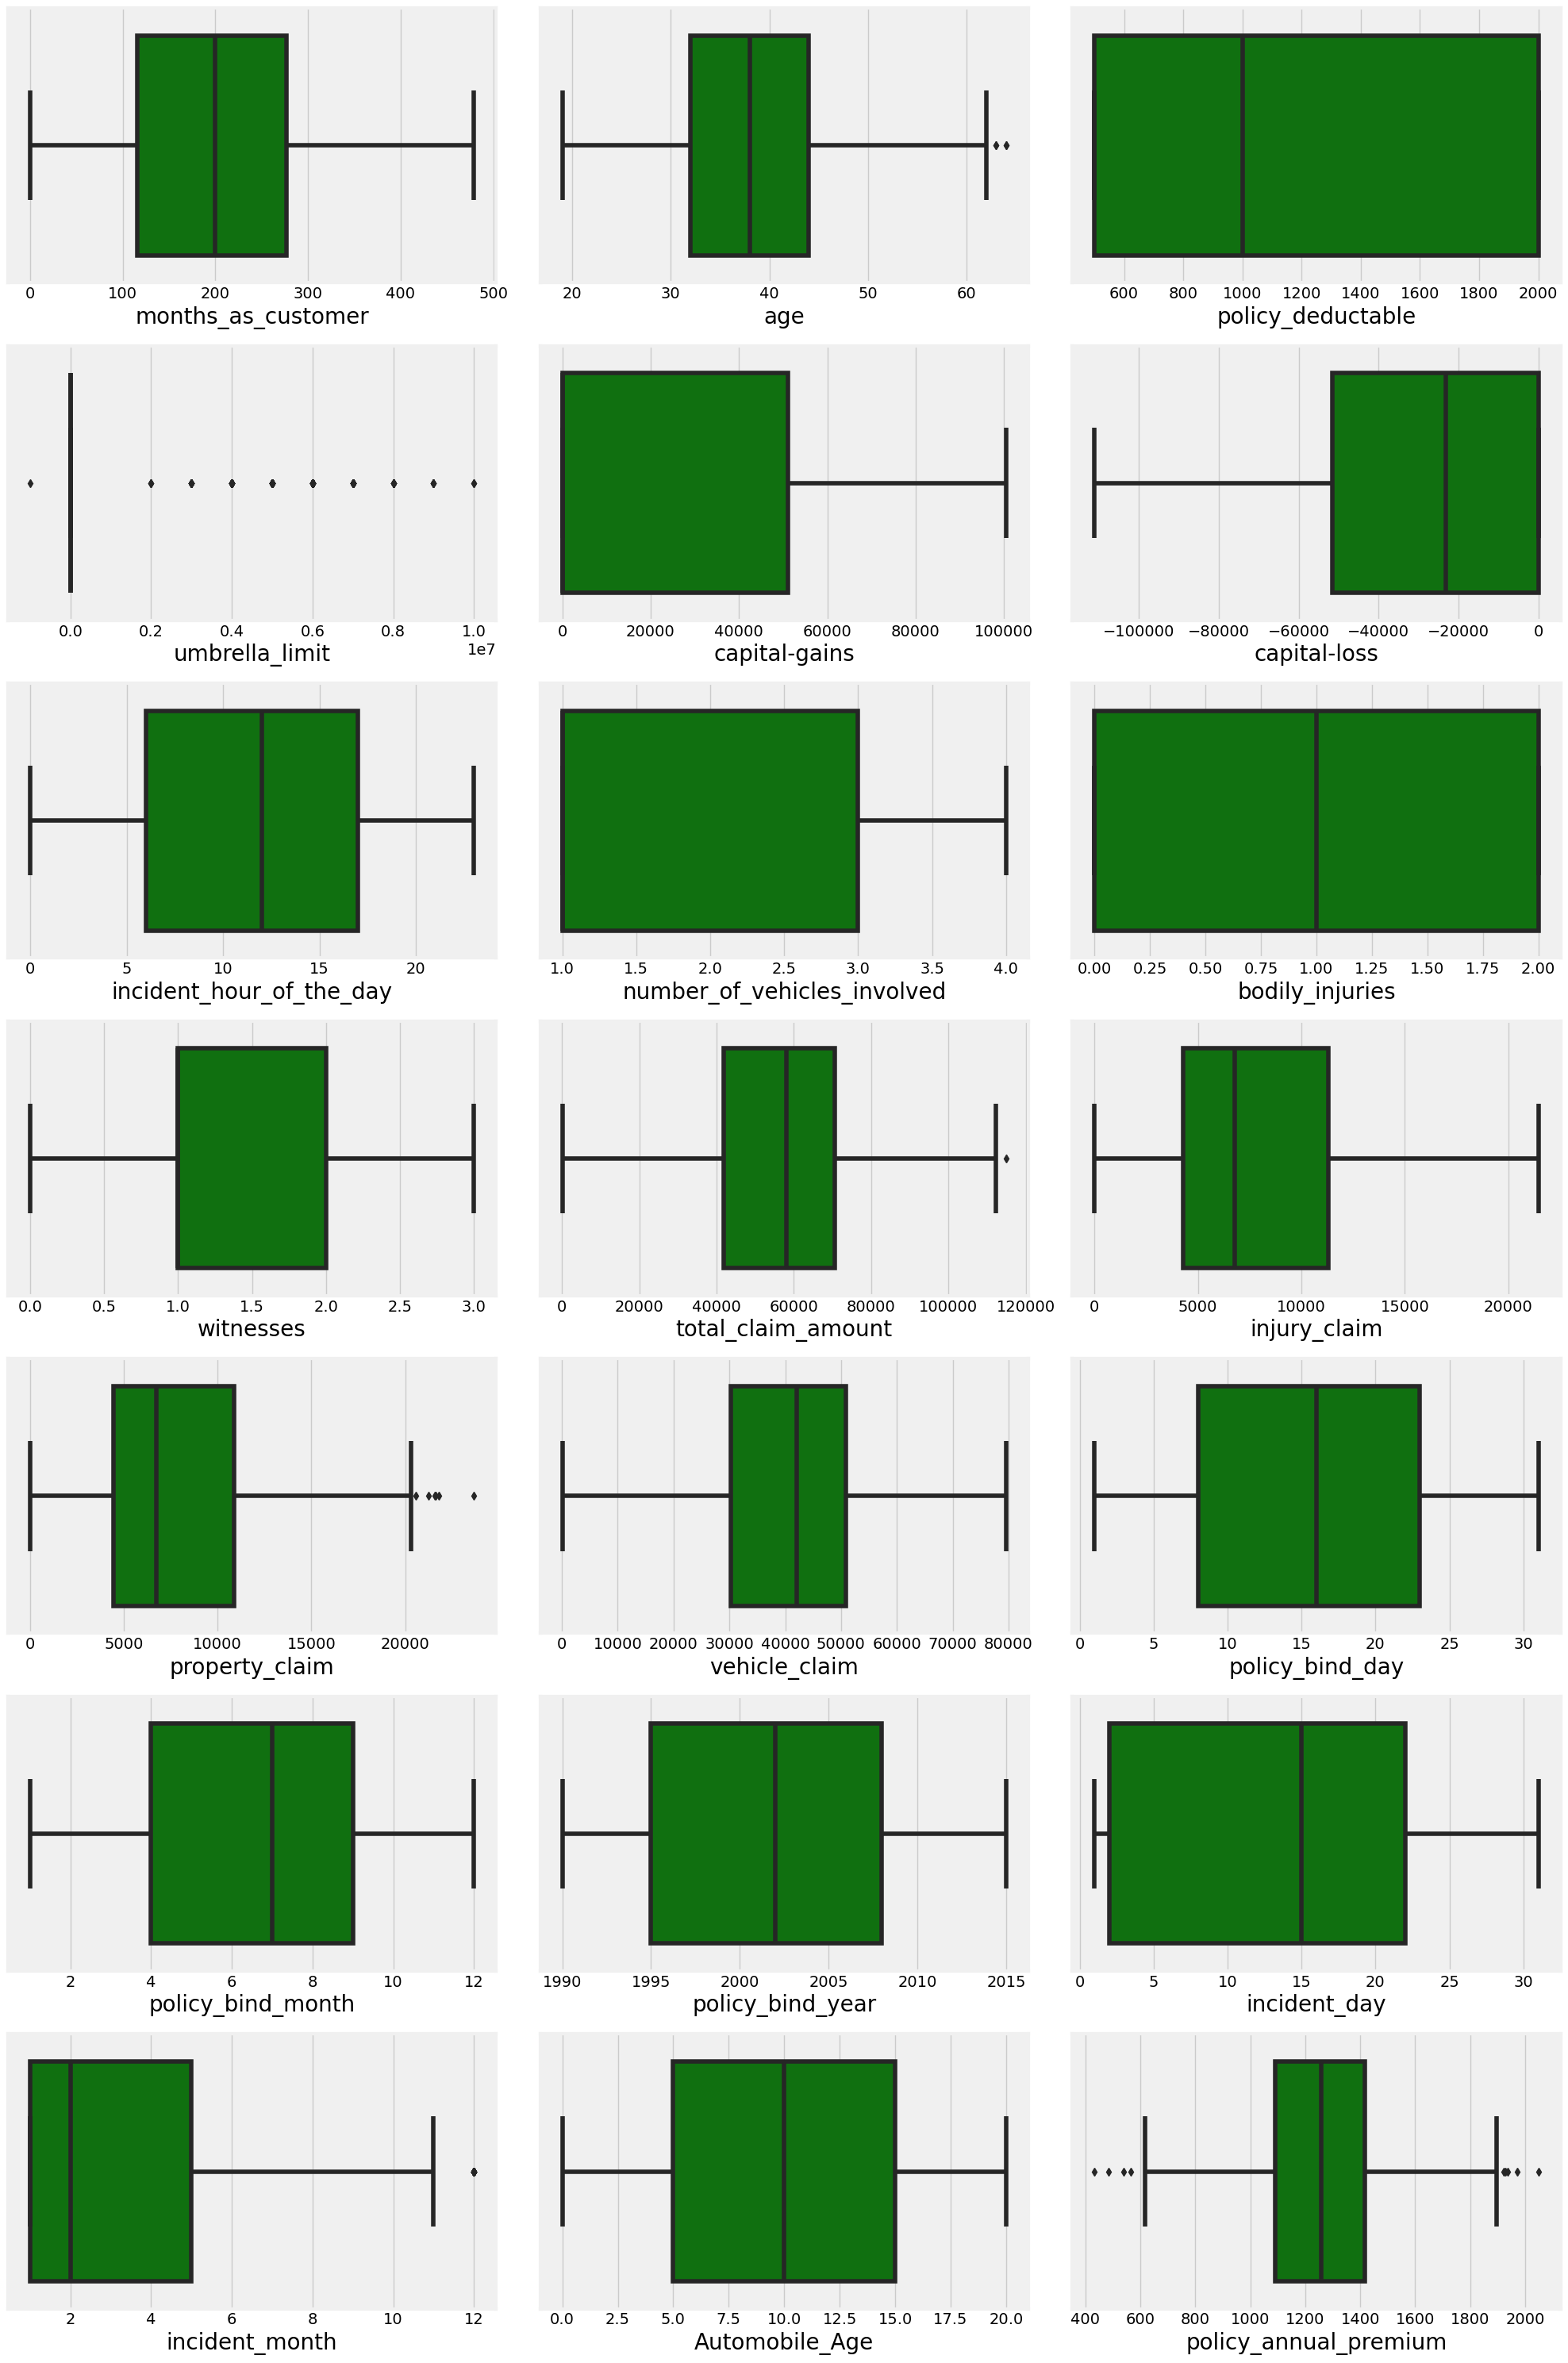

In [60]:

plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(claim_dataset[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [61]:
#Outliers removal using Zscore method
from scipy.stats import zscore
z = np.abs(zscore(claim_dataset))
threshold = 3
claim_dataset1 = claim_dataset[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", claim_dataset.shape)
print ("Shape of the dataframe after removing outliers: ", claim_dataset1.shape)
print ("Percentage of data loss post outlier removal: ", (claim_dataset.shape[0]-claim_dataset1.shape[0])/claim_dataset.shape[0]*100)

claim_dataset=claim_dataset1.copy()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

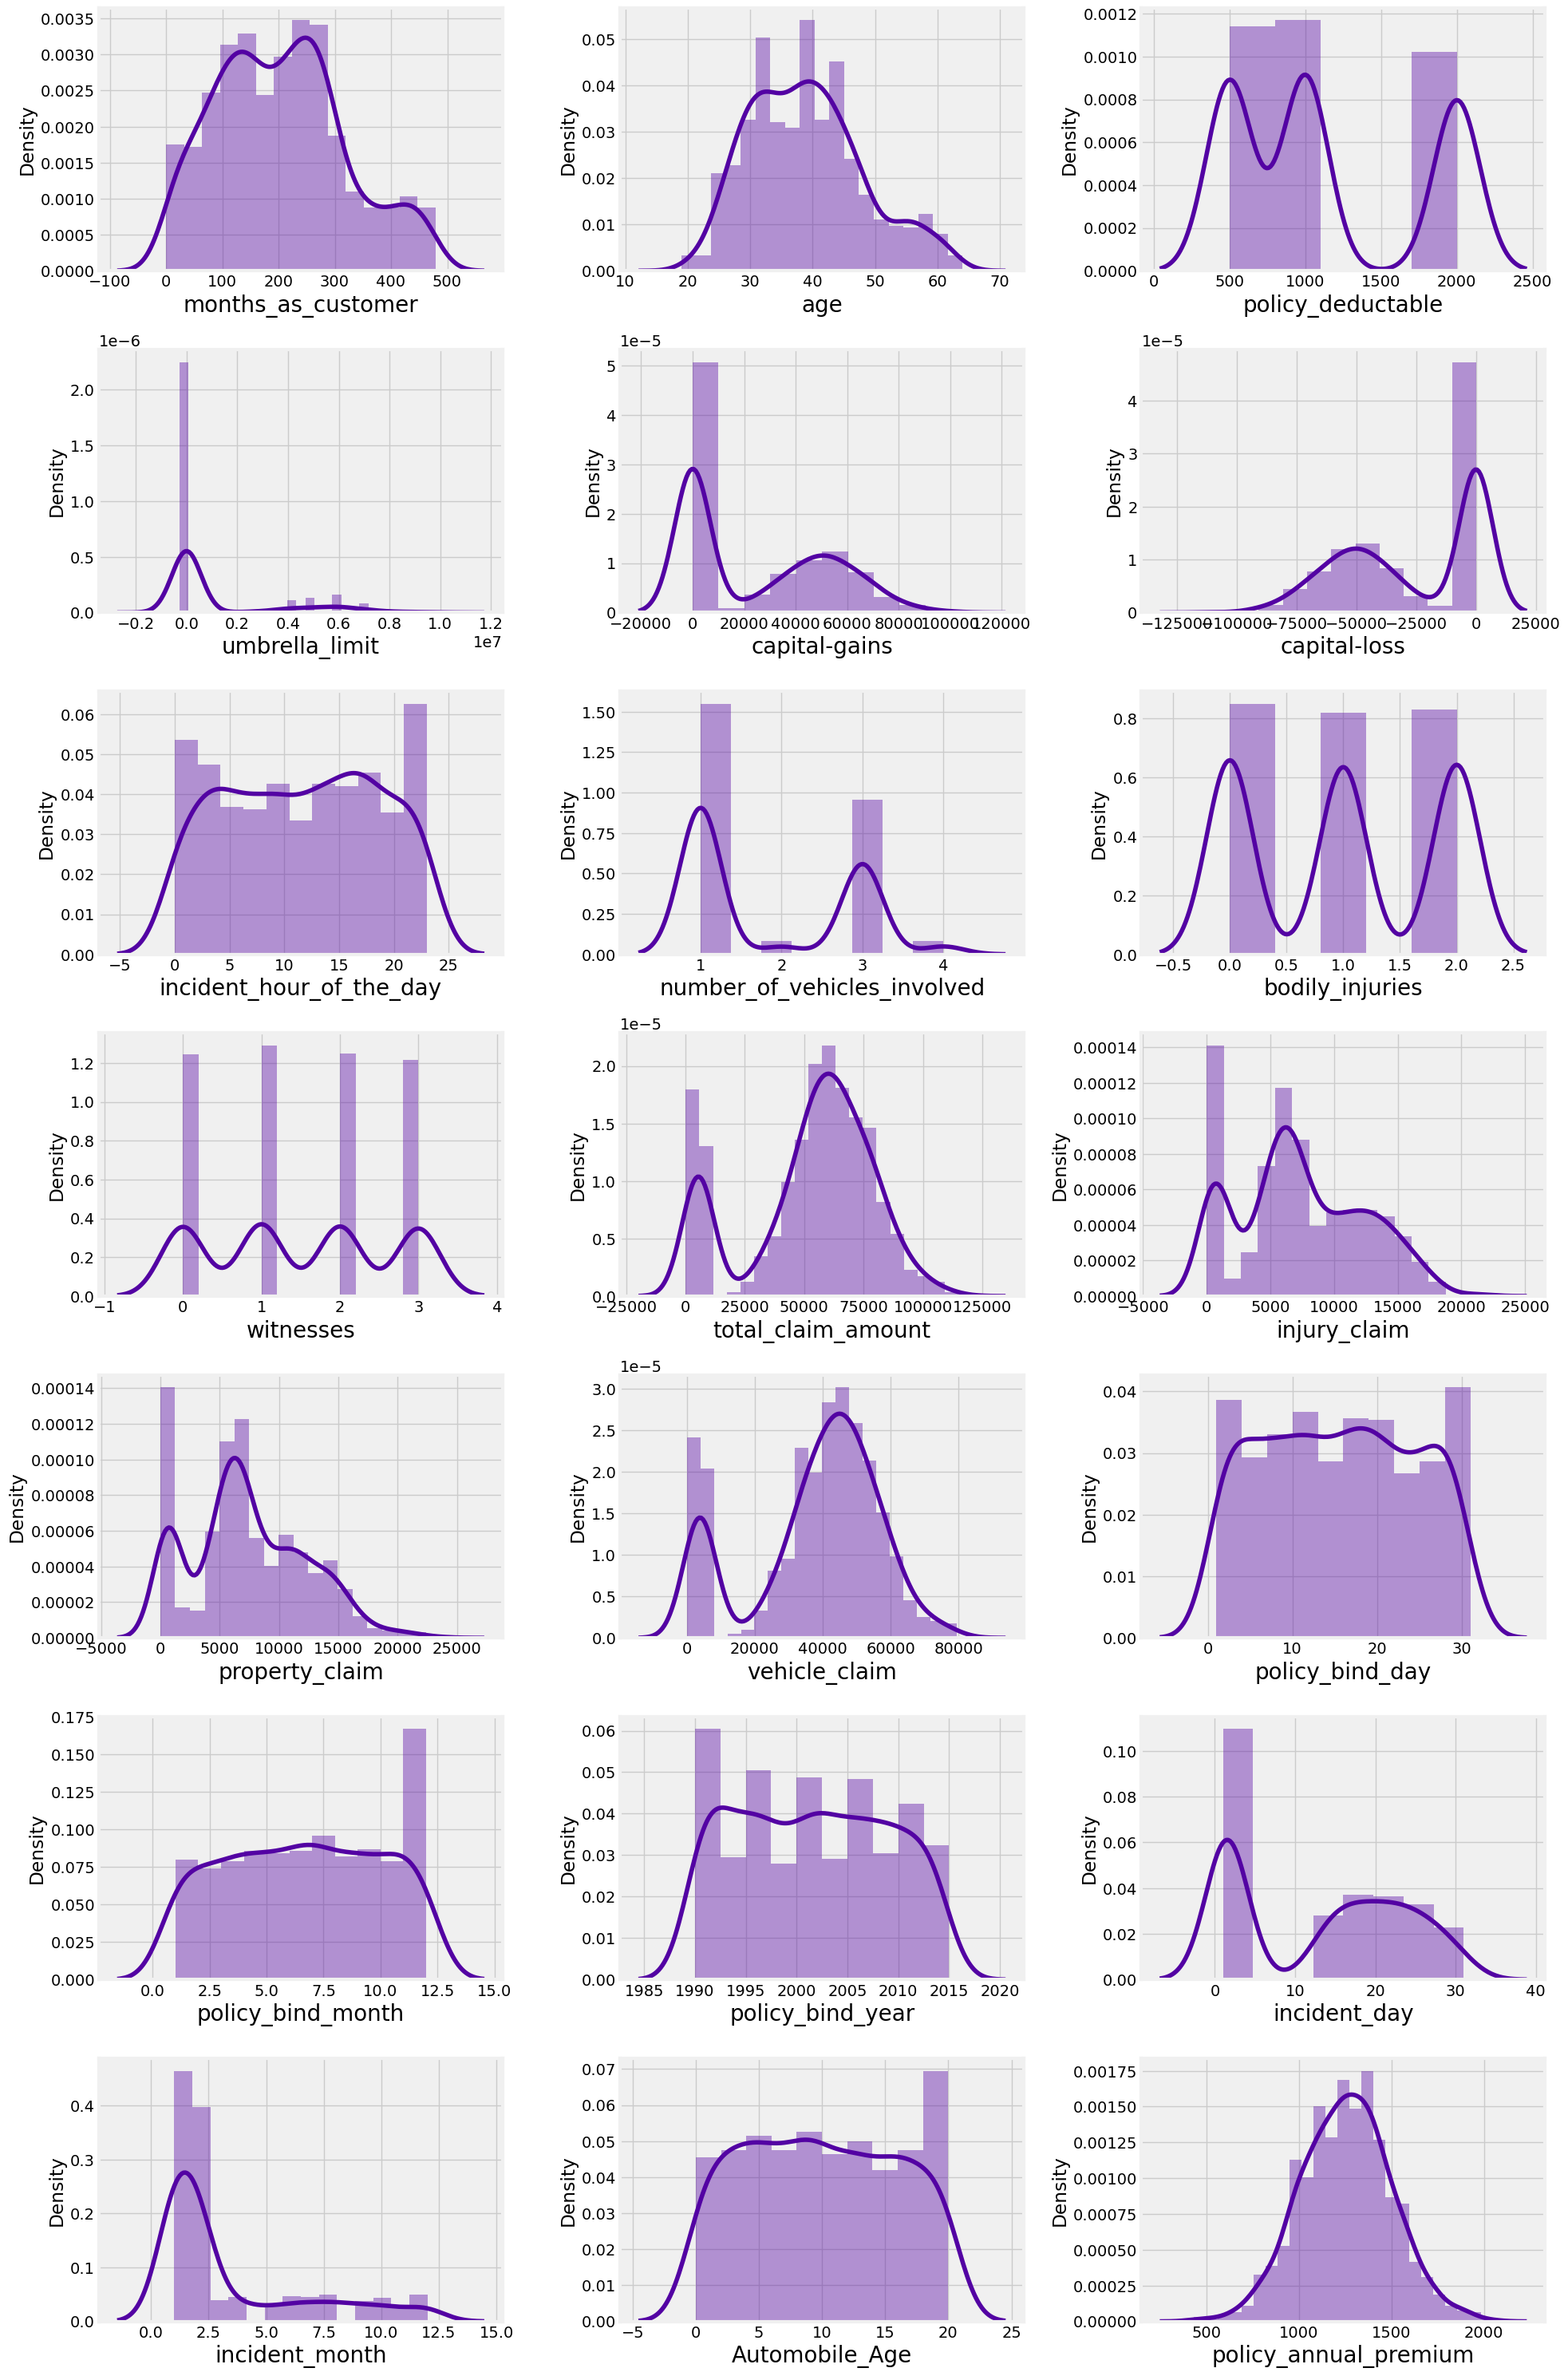

In [63]:
#Skewness of features
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(claim_dataset[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [64]:
claim_dataset[Numerical].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
Automobile_Age                 0.048289
policy_annual_premium          0.004402
dtype: float64

In [65]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
claim_dataset[skew] = scaler.fit_transform(claim_dataset[skew].values)


In [66]:
#Checking Skewness after transformation
claim_dataset[skew].skew()

total_claim_amount   -0.510354
vehicle_claim        -0.522718
dtype: float64

In [67]:
# Correlation
claim_dataset.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_state                          -0.000328 -0.014533       0.072815   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.017824 -0.018672      -0.013402   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.007040 -0.001486       0.005575   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available                0.017647  0.014661       0.032019   
total_claim_amount                     0.062495  0.070386      -0.018536   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061308  0.062764      -0.020981   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
fraud_reported                         0.020544  0.012143      -0.029443   
_c39                                        NaN       NaN            NaN   
policy_bind_day                        0.051728  0.053869       0.041885   
policy_bind_month                      0.005750  0.015501       0.005509   
policy_bind_year                      -0.048276 -0.037444      -0.040099   
incident_day                          -0.011092 -0.006131       0.057199   
incident_month                         0.024659  0.023404      -0.042512   
Automobile_Age                         0.000292 -0.001354       0.000183   

                             policy_state  policy_deductable  \
months_as_customer              -0.000328           0.026807   
age                             -0.014533           0.029188   
policy_number                    0.072815          -0.006738   
policy_state                     1.000000           0.010033   
policy_deductable                0.010033           1.000000   
policy_annual_premium            0.012455          -0.003245   
umbrella_limit                  -0.029580           0.010870   
insured_zip                      0.008777           0.004545   
insured_sex                     -0.020481          -0.009733   
insured_education_level         -0.034327           0.015217   
insured_occupation              -0.031215          -0.046733   
insured_hobbies                 -0.038689           0.004061   
insu

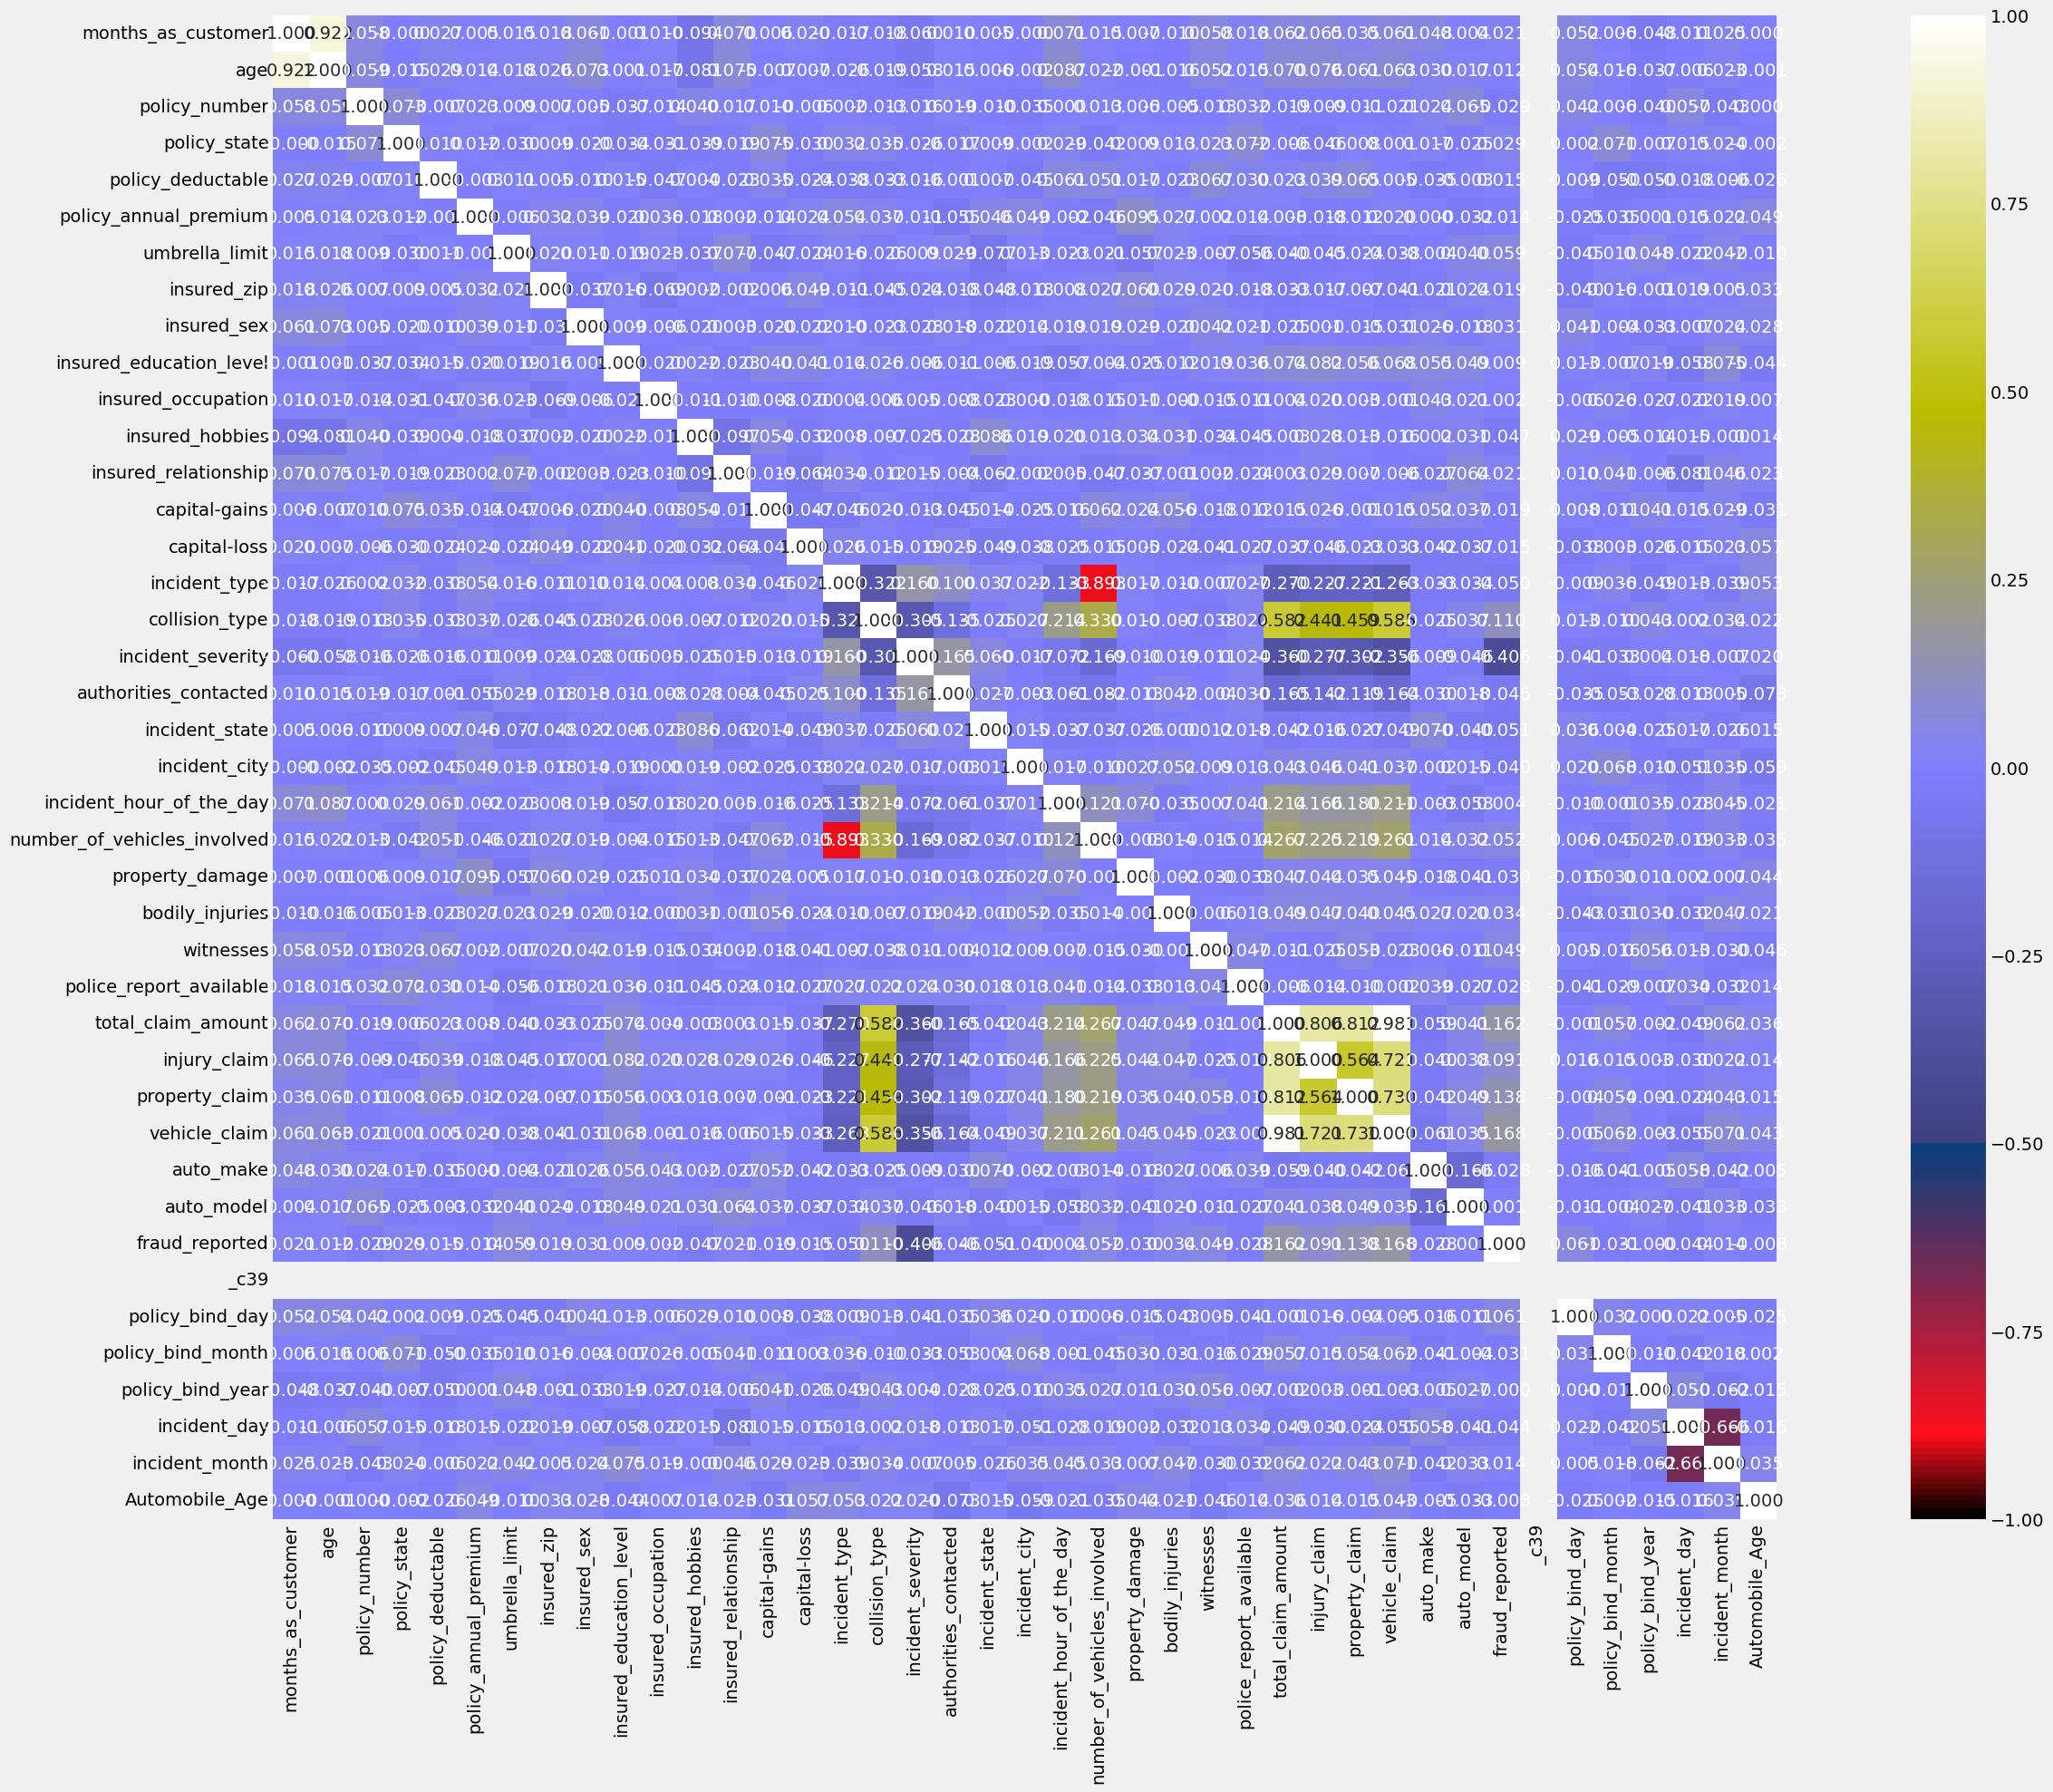

In [68]:
plt.figure(figsize=(30,20))
sns.heatmap(claim_dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()


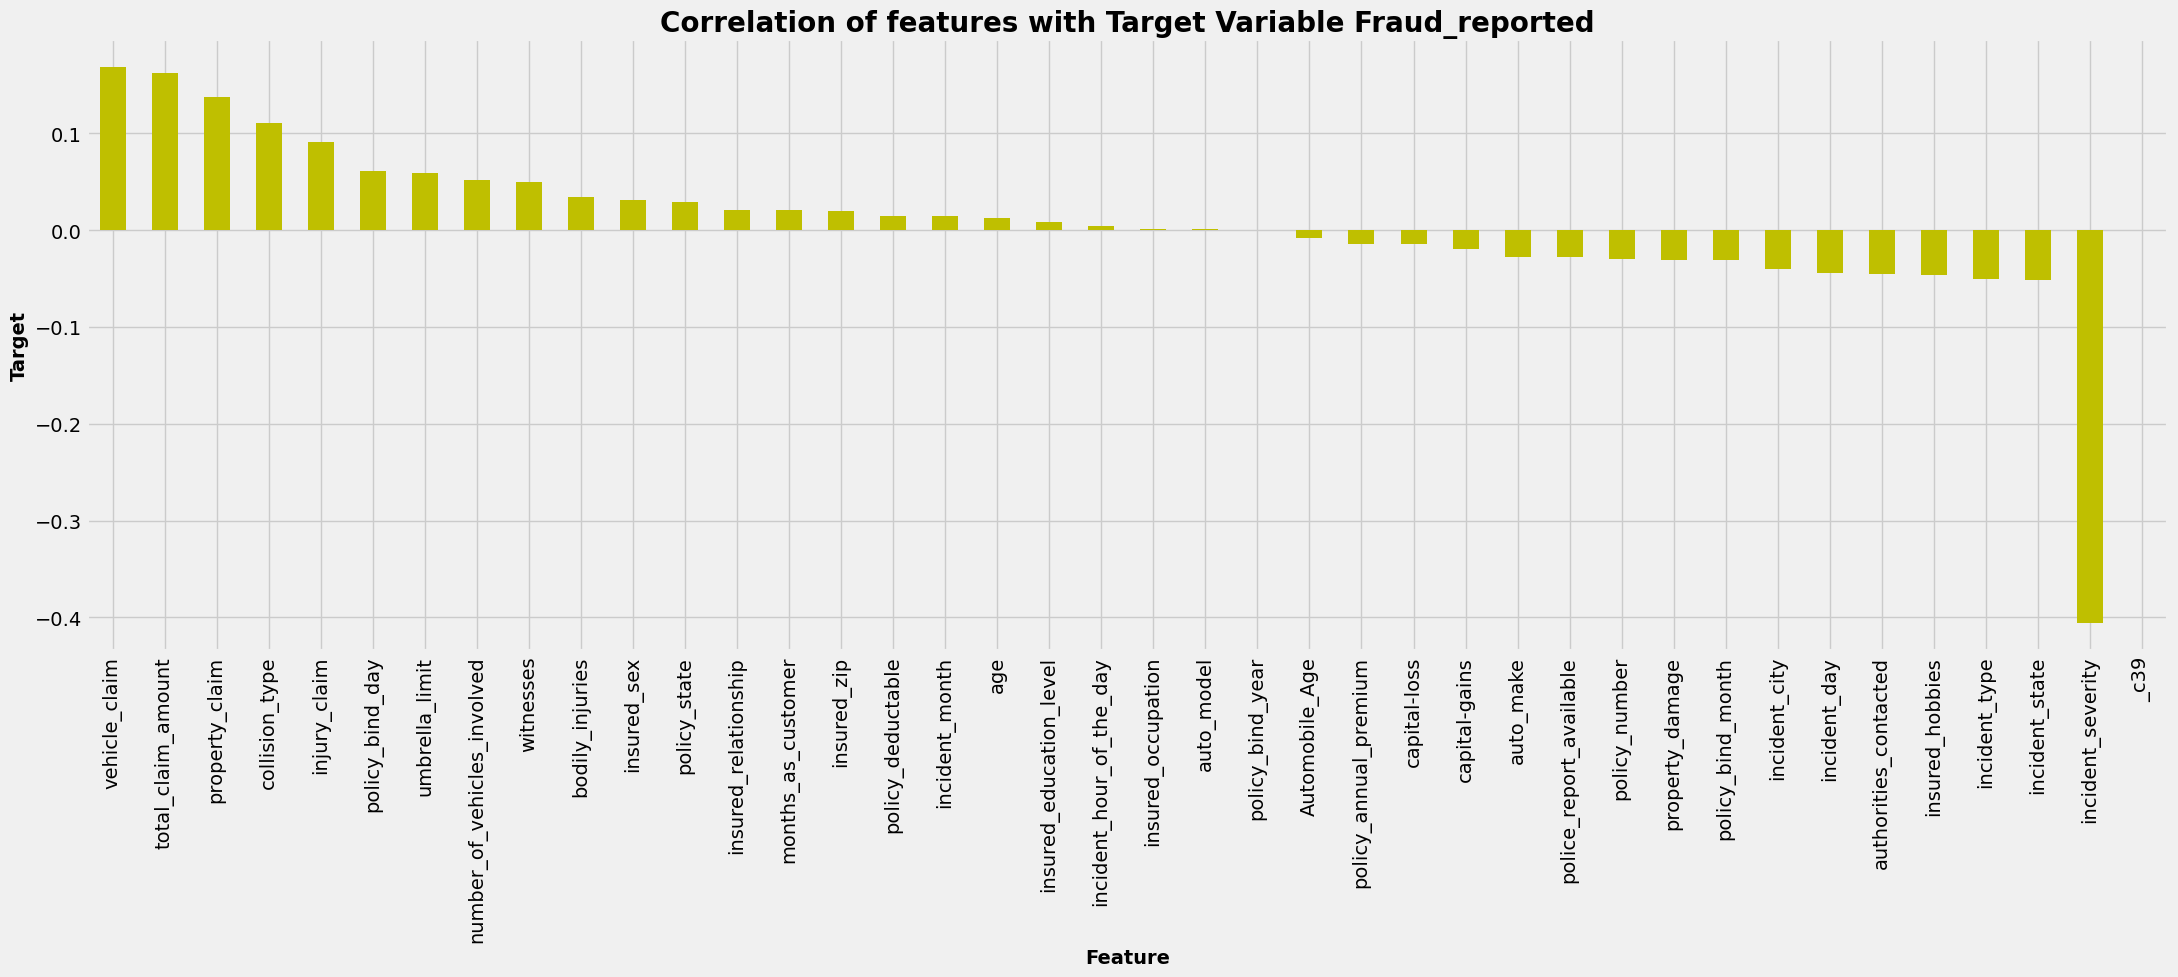

In [69]:
plt.figure(figsize=(22,10))
claim_dataset.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()


In [80]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE


In [81]:
#Balanceing Imbalanced target feature
claim_dataset.fraud_reported.value_counts()


0    753
1    247
Name: fraud_reported, dtype: int64

In [82]:
# Splitting data in target and dependent feature
X = claim_dataset.drop(['fraud_reported'], axis =1)
Y = claim_dataset['fraud_reported']


In [84]:
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [85]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


ValueError: could not convert string to float: '250/500'

In [86]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()


NameError: name 'X_scale' is not defined

In [89]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)


NameError: name 'X_scale' is not defined

In [90]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

NameError: name 'x_new' is not defined

In [87]:
#Machine Learning Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


NameError: name 'principle_x' is not defined

In [91]:
#Finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

NameError: name 'principle_x' is not defined

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

NameError: name 'principle_x' is not defined